# Data & Apprentissage, M2CHPS 2023

## Assignments - Part 2

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Assignments2.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Assignments1.ipynb).

## 0. Before you start

* This assignement has already few exercises and  will be completed 2 weeks before the final deadline. You can start working on them and get any update as you go.
* Work on the assignment either alone or in a team of two (pair). Students that will work alone will benefit from a 15% bonus. Important: The point in working in a pair is not to split the work, but to collaborate! 
* Prepare **a single jupiter notebook** in a report-like format for all the exercises. Use this notebook as a starting point and place your answers just below each exercise. Describe properly what you do in each step of your solution, followed by your well-commented code implementation that can automatically produce figures and numerical results. Results should also be well-commented and discussed. Your comments can be either in English or in French.
* If you need to provide mathematical expressions, incorporate all that in your notebook in a latex form (not handwritten!). 
* Important: send your notebook that includes all your work and any additional files you used (e.g. datasets) at by email, with a title ``M2CHPS <year> - <Surname1> & <Surname2>``. The title of the notebook should have the surnames of the students. The body of the email should also mention the students' names and how they split the work; if you face difficulties in clarifying this with your classmate, please write separate emails with your views. 
* Always use references for things you reuse (e.g. internet, forums, books, published papers, etc.)
* Do not copy-paste from the internet recipies that do the asked thing (or what is most usually observed: to use something relevant but not exactly what is asked). You need to understand what you use (sources should be properly referenced), adapt it to what each exercise asks for, and comment clearly the results. Poorly commented and explained pieces of work/code will not be taken seriously into account. 
* Copying from one another is not acceptable. We are strict with that: cheating in even one exercise will incur **a zero to all projects** (not just one assignement) and possible disqualification from the exams. Your work will be cross-checked against anything similar submitted from past students of the course.
* The assignments will be examined orally at the end of the semester. Each group of students should be able to explain in about 10 mins all what they did, and answer short questions.
* **Deadline: midnight of Sunday 1/12.**
* **Late submissions:** the maximum possible grade is penalized by 5%/day. E.g. when delivering on time the best grade is 20/20, late submission by one day gets at best 19/20, for two days late of delay 18/20...  
* **Slot for questions: Friday 15/11 at 14h**. Zoom link: https://kalogeratos.com/zoom. Meeting ID: 243 940 6970 -- Passcode: 15881598

## Exercise 1 [15%]

A security system relies on a battery ($b$), two sensors ($c$ and $d$), and an alarm ($a$). The random variables $a$, $b$, $c$ are binary, and $a=1$ when the alarm fires, $b=1$ when the battery functions properly, and $c=1$ and $d=1$ when the respective sensor functions properly. Otherwise, each variable takes the value $0$.

The architecture of the system is as follows: the battery provides power with independent cables to the two sensors, and the sensors feed information to the alarm that can then fire to signify a threat. Each sensor can operate even with only its internal power source that it is equipped with, but in that case it becomes much more sensitive to fail compared to when the external battery is functioning normally. 

The manual of the system says that the probability for the battery to fail is 0.1, and that each sensor fails with probability 0.01 when the battery is ok, and with 0.7 when the battery is not ok. 

Additionally, the manual also informs us that if at least one sensor works fine, then the alarm fires with probability 0.02. Otherwise the alarm fires with 30 times higher probability.

**a)** Draw the graphical model of the system involving the random variables.

**b)** Compute the joint probabilities $p(a,b,c,d)$ and $p(a,c)$. Also check if $c$ and $d$ are independent.

**c)** Suppose **the alarm is silent** and that we check that **only the sensor $d$ works properly**. What is the posterior of having a disfunctioning battery?

**d)** Compute the probability for the alarm to be silent, $p(a=0)$.

**e)** We know that when at least one sensor works fine then the alarm fires with 0.02 (which let's suppose it is as much as as it is normal), otherwise with 0.6. We want to know how many sensors should the system have (connected like $c$ and $d$ in the initial design) such that the total probability $p(a=1) < 0.05$.

**f)** Suppose **we don't hear any alarm** (with good ears!) and **we have no information about the sensors** functioning. What is the probability for the battery to be disfunctioning?

**g)** Implement a function that generates observations from the probabilistic model at the top. Then make simulations to confirm empirically the estimations you calculated by hand.

## Solution exercice 1 
### Graphical model involving the random variables 

<img src="./graphical-model-ex1.png" alt="graphical model" width="200px"/>

### Compute the joint probabilities $p(a,b,c,d)$ & $p(a,c)$

- First let's write all the probabilities we have from the exercice statement 
- $p(b=0) = 0.1                             \Longrightarrow  p(b=1) = 0.9$.
- $p(c=0|b=1) = p(d=0|b=1) = 0.01           \Longrightarrow p(c=1|b=1) = p(d=1|b=1) = 0.99 $
- $p(c=0|b=0) = p(d=0|b=0) = 0.7            \Longrightarrow p(c=1|b=0) = p(d=1|b=0) = 0.3$
- $p(a=1|c=1,d=0) = p(a=1|c=0,d=1) = p(a=1|c=1,d=1)= 0.02   \Longrightarrow p(a=0|c=1,d=0) = p(a=0|c=0,d=1) = p(a=0|c=0,d=0) = 0.98$
- $p(a=1|c=0,d=0) = 30 \times 0.02 = 0.6    \Longrightarrow p(a=0|c=0,d=0) = 0.4 $

#### Compute $p(a,b,c,d)$
Now to compute the joint probabilities of $p(a,b,c,d)$ given the chain rule we have

$p(a,b,c,d) = p(a|b,c,d)p(b,c,d)$

and since $a$ only depend from $c$ and $d$ (from the graphical model) :

$p(a,b,c,d) = p(a|c,d)p(b,c,d)$

by decomposing $p(b,c,d)$ we have

$p(b,c,d) = p(c,d|b).p(b)$

and since $c$ and $d$ only depends on $b$ (from the graphical model) :

$p(c,d|b) = p(c|b)p(d|b)p(b)$

and so by replacing in the first formula we get 

$p(a,b,c,d) = p(a|c,d)p(c|b)p(d|b)p(b)$

now we have to compute the joint probabilities for all 16 possibilities we must find $p(a,b,c,d) = 1$

- $(a=0,b=0,c=0,d=0)$ : $ p(a=0|c=0,d=0)p(c=0|b=0)p(d=0|b=0)p(b=0) = 0.4  \times 0.7 \times 0.7 \times 0.1 = 0.0196 $ <!-- OK -->
- $(a=0,b=0,c=0,d=1)$ : $ p(a=0|c=0,d=1)p(c=0|b=0)p(d=1|b=0)p(b=0) = 0.98 \times 0.7 \times 0.3 \times 0.1 = 0.02058$ <!-- OK -->
- $(a=0,b=0,c=1,d=0)$ : $ p(a=0|c=1,d=0)p(c=1|b=0)p(d=0|b=0)p(b=0) = 0.98 \times 0.3 \times 0.7 \times 0.1 = 0.02058$ <!-- OK -->
- $(a=0,b=0,c=1,d=1)$ : $ p(a=0|c=1,d=1)p(c=1|b=0)p(d=1|b=0)p(b=0) = 0.98 \times 0.3 \times 0.3 \times 0.1 = 0.00882$ <!-- OK -->

- $(a=0,b=1,c=0,d=0)$ : $ p(a=0|c=0,d=0)p(c=0|b=1)p(d=0|b=1)p(b=1) = 0.4  \times 0.01  \times 0.01  \times 0.9 = 0.000036 $ <!-- OK -->
- $(a=0,b=1,c=0,d=1)$ : $ p(a=0|c=0,d=1)p(c=0|b=1)p(d=1|b=1)p(b=1) = 0.98 \times 0.01  \times 0.99  \times 0.9 = 0.0087318$ <!-- OK -->
- $(a=0,b=1,c=1,d=0)$ : $ p(a=0|c=1,d=0)p(c=1|b=1)p(d=0|b=1)p(b=1) = 0.98 \times 0.99  \times 0.01  \times 0.9 = 0.0087318$ <!-- OK -->
- $(a=0,b=1,c=1,d=1)$ : $ p(a=0|c=1,d=1)p(c=1|b=1)p(d=1|b=1)p(b=1) = 0.98 \times 0.99  \times 0.99  \times 0.9 = 0.8644482$ <!-- OK -->

- $(a=1,b=0,c=0,d=0)$ : $ p(a=1|c=0,d=0)p(c=0|b=0)p(d=0|b=0)p(b=0) = 0.6  \times 0.7 \times 0.7 \times 0.1 = 0.0294 $ <!-- OK -->
- $(a=1,b=0,c=0,d=1)$ : $ p(a=1|c=0,d=1)p(c=0|b=0)p(d=1|b=0)p(b=0) = 0.02 \times 0.7 \times 0.3 \times 0.1 = 0.00042$ <!-- OK -->
- $(a=1,b=0,c=1,d=0)$ : $ p(a=1|c=1,d=0)p(c=1|b=0)p(d=0|b=0)p(b=0) = 0.02 \times 0.3 \times 0.7 \times 0.1 = 0.00042$ <!-- OK -->
- $(a=1,b=0,c=1,d=1)$ : $ p(a=1|c=1,d=1)p(c=1|b=0)p(d=1|b=0)p(b=0) = 0.02 \times 0.3 \times 0.3 \times 0.1 = 0.00018$ <!-- OK -->

- $(a=1,b=1,c=0,d=0)$ : $ p(a=1|c=0,d=0)p(c=0|b=0)p(d=0|b=1)p(b=1) = 0.6  \times 0.01 \times 0.01 \times 0.9 = 0.000054 $ <!-- OK -->
- $(a=1,b=1,c=0,d=1)$ : $ p(a=1|c=0,d=1)p(c=0|b=1)p(d=1|b=1)p(b=1) = 0.02 \times 0.01 \times 0.99 \times 0.9 = 0.0001782$ <!-- OK -->
- $(a=1,b=1,c=1,d=0)$ : $ p(a=1|c=1,d=0)p(c=1|b=1)p(d=0|b=1)p(b=1) = 0.02 \times 0.99 \times 0.01 \times 0.9 = 0.0001782$ <!-- OK -->
- $(a=1,b=1,c=1,d=1)$ : $ p(a=1|c=1,d=1)p(c=1|b=1)p(d=1|b=1)p(b=1) = 0.02 \times 0.99 \times 0.99 \times 0.9 = 0.0176418$ <!-- OK -->



And we fill the table below

| **a** | **b** | **c** | **d** | **result**
|--------:|:-----------|:----------|:----------|:----------|
| **0** | **0** | **0** | **0** | 0.0196    | 
| **0** | **0** | **0** | **1** | 0.02058   | 
| **0** | **0** | **1** | **0** | 0.02058   | 
| **0** | **0** | **1** | **1** | 0.00882   | 
| **0** | **1** | **0** | **0** | 0.000036  | 
| **0** | **1** | **0** | **1** | 0.0087318 | 
| **0** | **1** | **1** | **0** | 0.0087318 | 
| **0** | **1** | **1** | **1** | 0.8644482 | 
| **1** | **0** | **0** | **0** | 0.0294    | 
| **1** | **0** | **0** | **1** | 0.00042   | 
| **1** | **0** | **1** | **0** | 0.00042   | 
| **1** | **0** | **1** | **1** | 0.00018   | 
| **1** | **1** | **0** | **0** | 0.000054  | 
| **1** | **1** | **0** | **1** | 0.0001782 | 
| **1** | **1** | **1** | **0** | 0.0001782 | 
| **1** | **1** | **1** | **1** | 0.0176418 | 


and if we sum all the probabilities we get :
$0.0196 + 0.02058 + 0.02058 + 0.00882 + 0.000036 + 0.0087318 + 0.0087318 + 0.8644482 + 0.0294 + 0.00042 + 0.00042 + 0.00018 + 0.000054 + 0.0001782 + 0.0001782 + 0.0176418 = 1$


#### Compute $p(a,c)$
Now let's compute the joint probabilities of $p(a,c)$ since we have $p(a,b,c,d)$ we can marginalize by summing the joint probabilities of 
$ p(a,c) = \sum_{b\in {0,1} } \sum_{d\in {0,1} }p(a,b,c,d)$ for each pair $(a,c)$

- $p(a=0,c=0) = \sum_{b\in {0,1} } \sum_{d\in {0,1} }p(a=0,b,c=0,d) = p(a=0,b=0,c=0,d=0) + p(a=0,b=0,c=0,d=1) + p(a=0,b=1,c=0,d=0) + p(a=0,b=1,c=0,d=1) = 0.0196 + 0.02058 + 0.000036 + 0.0087318 = 0.0489478$

- $p(a=0,c=1) = \sum_{b\in {0,1} } \sum_{d\in {0,1} }p(a=0,b,c=1,d) = p(a=0,b=0,c=1,d=0) + p(a=0,b=0,c=1,d=1) + p(a=0,b=1,c=1,d=0) + p(a=0,b=1,c=1,d=1) = 0.02058 + 0.00882 + 0.0087318 + 0.8644482 = 0.9025800$

- $p(a=1,c=0) = \sum_{b\in {0,1} } \sum_{d\in {0,1} }p(a=1,b,c=0,d) = p(a=1,b=0,c=0,d=0) + p(a=1,b=0,c=0,d=1) + p(a=1,b=1,c=0,d=0) + p(a=1,b=1,c=0,d=1) = 0.0294 + 0.00042 + 0.000054 + 0.0001782 = 0.0300522 $

- $p(a=1,c=1) = \sum_{b\in {0,1} } \sum_{d\in {0,1} }p(a=1,b,c=1,d) = p(a=1,b=0,c=1,d=0) + p(a=1,b=0,c=1,d=1) + p(a=1,b=1,c=1,d=0) + p(a=1,b=1,c=1,d=1) = 0.00042 + 0.00018 + 0.0001782 + 0.0176418 =  0.0184200$


And we get 
$p(a,c) = \sum_{b\in {0,1} } \sum_{d\in {0,1} }p(a,b,c,d) = 0.018420 + 0.0300522 + 0.9025800 + 0.0489478 = 1 $

#### Determine if $c$ and $d$ are independant
to determine if $c$ and $d$ are independant variables if $p(c,d) = p(c) p(d)$ i.e the joint probability $p(c,d)$ must equal the marginal probabilities $p(c).p(d)$ in all cases.

$ p(c,d) = \sum_{a\in {0,1} } \sum_{b\in {0,1} }p(a,b,c,d)$

$p(c) = \sum_{d\in {0,1} }p(c,d)$

$p(d) = \sum_{c\in {0,1} }p(c,d)$

##### compute $p(c,d)$

- $p(c=0,d=0) = \sum_{a\in {0,1} } \sum_{b\in {0,1} }p(a,b,c,d) = p(a=0,b=0,c=0,d=0) + p(a=0,b=1,c=0,d=0) + p(a=1,b=0,c=0,d=0) + p(a=1,b=1,c=0,d=0) = 0.0196 + 0.000036 + 0.0294 + 0.000054 = 0.04909 $

- $p(c=0,d=1) = \sum_{a\in {0,1} } \sum_{b\in {0,1} }p(a,b,c,d)= p(a=0,b=0,c=0,d=1) + p(a=0,b=1,c=0,d=1) + p(a=1,b=0,c=0,d=1) + p(a=1,b=1,c=0,d=1) = 0.02058 + 0.0087318 + 0.00042 + 0.0001782 = 0.02991 $

- $p(c=1,d=0) = \sum_{a\in {0,1} } \sum_{b\in {0,1} }p(a,b,c,d)= p(a=0,b=0,c=1,d=0) + p(a=0,b=1,c=1,d=0) + p(a=1,b=0,c=1,d=0) + p(a=1,b=1,c=1,d=0) = 0.02058 + 0.0087318 + 0.00042 + 0.0001782 = 0.02991  $

- $p(c=1,d=1) = \sum_{a\in {0,1} } \sum_{b\in {0,1} }p(a,b,c,d)= p(a=0,b=0,c=1,d=1) + p(a=0,b=1,c=1,d=1) + p(a=1,b=0,c=1,d=1) + p(a=1,b=1,c=1,d=1) = 0.00882 + 0.8644482 + 0.00018 + 0.0176418 = 0.89109 $

##### compute marges $p(c)$ and $p(d)$

- $p(c=0) = p(c=0,d=0) + p(c=0,d=1) = 0.04909 + 0.02991 = 0.079$ 
- $p(c=1) = p(c=1,d=0) + p(c=1,d=1) = 0.02991 + 0.89109 = 0.921$

- $p(d=0) = p(c=0,d=0) + p(c=1,d=0) = 0.04909 + 0.02991 = 0.079$
- $p(d=1) = p(c=0,d=1) + p(c=1,d=1) = 0.02991 + 0.89109 = 0.921$

##### verify that $p(c,d) = p(c)p(d)$

- for $c=0,d=0$
    $p(c=0) \times p(d=0) = 0.079 \times 0.079 = 0.006241$

    $p(c=0,d=0) = 0.04909$

    $p(c=0,d=0) \neq p(c=0)p(d=0)$

Since we have a case where the equality is not respected we can say that $c$ and $d$ are not independant

### Supposing **the alarm is silent** and that we check that **only the sensor $d$ works properly**. What is the posterior of having a disfunctioning battery?

let's start withe the bayes theorem 
$$ P(A|B) = \frac{P(A) P(B|A)}{P(B)}
$$

applying the theorem to this question yields
$$ p(b=0|c=0,d=1,a=0) = \frac{p(b=0).p(a=0|c=0,d=1,b=0)}{p(a=0,c=0,d=1)} $$

- we know that $p(b=0) = 0.1$
- we know that $p(a=0|c=0,d=1,b=0) = 0.02058$ from the table
- we only need to compute $p(a=0,c=0,d=1)$
$ p(a=0,c=0,d=1) = p(a=0,c=0,d=1,b=0) + p(a=0,c=0,d=1,b=1) = 0.02058 + 0.0087318 = 0.029118$

now we can compute $p(b=0|c=0,d=1,a=0)$

$$ p(b=0|c=0,d=1,a=0) = \frac{p(b=0).p(a=0|c=0,d=1,b=0)}{p(a=0,c=0,d=1)} = \frac{0.1 \times 0.02058}{0.0293118} = 0.07$$

### Compute the probability for the alarm to be silent, $p(a=0)$

we just need to add up all the cases where $a=0$ or, more clearly we need to compute :
$$   p(a=0) = \sum_{b \in {0,1}}\sum_{c \in {0,1}}\sum_{d \in {0,1}}p(a=0,b,c,d) $$
$ = p(a=0,b=0,c=0,d=0) + p(a=0,b=0,c=0,d=1) + p(a=0,b=0,c=1,d=0) + p(a=0,b=0,c=1,d=1) + p(a=0,b=1,c=0,d=0) + p(a=0,b=1,c=0,d=1) + p(a=0,b=1,c=1,d=0) + p(a=0,b=1,c=1,d=1)$
$$ = 0.0196 +0.02058 + 0.02058 + 0.00882 + 0.000036 + 0.0087318 + 0.0087318 = 0.0870796 $$


### We know that when at least one sensor works fine then the alarm fires with 0.02 (which let's suppose it is as much as as it is normal), otherwise with 0.6. We want to know how many sensors should the system have (connected like $c$ and $d$ in the initial design) such that the total probability $p(a=1) < 0.05$

we know that $p(a=1) = 1 - p(a=0) = 0.9129204$
we could also state that 
$$ p(a=1) = p(a=1|p_{f}).p(p_{f}) + p(a=1|p_{nf}).p(p_{nf})$$

with :

- $p_{f}$  the probability of 1 sensor at least functionning
- $p_{nf}$ the probability of no sensor functionning

we need to compute $p_{f}$

- $p(a=1|p_{f}) = 0.02$ 
- $(b=1),p_{f} = 0.99 $
- $(b=1),p_{f} = 0.3 $

so :

$$ p_{f} = p(b=1) . 0.99 + p(b=0) . 0.3 = 0.921$$

we need to compute $p_{nf}$, $p_{nf}$ depends on $k$ the number of sensors used :

- the probability of one sensor to be malfunctionning = $1 - p_{f}$
- and so $p_{nf} = (1 - p_{f})^{k} $
- and so $p_{f} = 1 - p_{nf} = 1 - (1 - p_{f})^{k}$

going back to $p(a=1)$

$$ p(a=1) = p(a=1|p_{f}).p(p_{f}) + p(a=1|p_{nf}).p(p_{nf})$$
$$ p(a=1) = 0.02 . [1 - (1 - p_{f})^{k}] + 0.6 . (1 - p_{f})^{k}$$ 

let's find $k$ for $p(a=1)< 0.05$

$$ 0.02 . [1 - (1 - p_{f})^{k}] + 0.6 . (1 - p_{f})^{k}  < 0.05$$
$$ 0.02 -0.02.(1 - p_{f})^{k} + 0.6 . (1 - p_{f})^{k}  < 0.05  $$
$$ 0.02 + (0.6-0.02).(1 - p_{f})^{k} < 0.05$$
$$ 0.02 + 0.058.(1 - p_{f})^{k} < 0.05 $$
$$ 0.058.(1 - p_{f})^{k} < 0.03 $$
$$ (1 - p_{f})^{k} < \frac{0.03}{0.58} $$
$$ (1 - p_{f})^{k} < 0.05172413$$
$$ k. ln(1-p_{f}) < ln(0.05172413) $$
$$ k > \frac{ln(0.05172413)}{ln(1-p_{f})}$$
$$ k > \frac{ln(0.05172413)}{ln(1-0.921)}$$
$$ k > 1.16$$


Therefore to make sure that $p(a=1) < 0.05$ we must have $k=2$ since k must be an integer.

### Supposing **we don't hear any alarm** (with good ears!) and **we have no information about the sensors** functioning. What is the probability for the battery to be disfunctioning

using bayes theorem we ca formulate that event like : 

$$ p(b=0|a=0) = \frac{p(b=0).p(a=0|b=0)}{p(a=0)}$$

- we know that $p(b=0) = 0.1$
- we know that $p(a=0) = 0.0870796$
- we only need to compute $p(a=0|b=0)$
  - $ p(a,b) = \sum_{c\in {0,1} } \sum_{d\in {0,1} }p(a=0,b=0,c,d)$
  - $p(a=0,b=0) = \sum_{c\in {0,1} } \sum_{c\in {0,1} }p(a,b,c,d) = p(a=0,b=0,c=0,d=0) + p(a=0,b=0,c=0,d=1) + p(a=0,b=0,c=1,d=0) + p(a=0,b=0,c=1,d=1) = 0.0196 + 0.02058 + 0.02058 + 0.00882 = 0.06958 $


so :
$$ p(b=0|a=0) = \frac{p(b=0).p(a=0|b=0)}{p(a=0)} = \frac{0.1 \times 0.06958}{0.0870796}$$
$$ p(b=0|a=0) = 0.79903$$















### Implementing a function that simulate the probabilistic model described 

In [5]:
import numpy as np

# our probabilistic model following the exercice
def model():
    # generate battery state (functionning or malfunctionning)
    b = np.random.choice([1, 0], p=[0.9, 0.1])
    
    # generate sensors states
    # sensor b
    prob_c_b = 0.99 if b == 1 else 0.3 # probability of c given b
    c = np.random.choice([1, 0], p=[prob_c_b, 1 - prob_c_b])
    
    # sensor c
    prob_d_b = 0.99 if b == 1 else 0.3 # probability if d given b
    d = np.random.choice([1, 0], p=[prob_d_b, 1 - prob_d_b])
    
    # generate alarm state (firing or silent)
    if c == 1 or d == 1:
        prob_a_cd = 0.02 # probability of a given c and d
    else:
        prob_a_cd = 0.6
    
    a = np.random.choice([1, 0], p=[prob_a_cd, 1 - prob_a_cd])
    
    return a, b, c, d

# running our model iter times
def simulate(iter):
    # running our model iter times
    observations = [model() for _ in range(iter)]
    observations = np.array(observations)
    
    # compute empirical probabilities
    unique, counts = np.unique(observations, axis=0, return_counts=True)
    empirical_probabilities = dict(zip(map(tuple, unique), counts / iter))
    
    return empirical_probabilities


n = 1000000
empirical_probs = simulate(n)

# printing the results
for key, value in sorted(empirical_probs.items()):
    print(f"P{key} = {value:.6f}")



P(0, 0, 0, 0) = 0.019610
P(0, 0, 0, 1) = 0.020560
P(0, 0, 1, 0) = 0.020375
P(0, 0, 1, 1) = 0.008821
P(0, 1, 0, 0) = 0.000031
P(0, 1, 0, 1) = 0.008890
P(0, 1, 1, 0) = 0.008650
P(0, 1, 1, 1) = 0.864676
P(1, 0, 0, 0) = 0.029384
P(1, 0, 0, 1) = 0.000455
P(1, 0, 1, 0) = 0.000421
P(1, 0, 1, 1) = 0.000162
P(1, 1, 0, 0) = 0.000044
P(1, 1, 0, 1) = 0.000173
P(1, 1, 1, 0) = 0.000163
P(1, 1, 1, 1) = 0.017585


### comparing computed results for n = 1 000 000
| **a** | **b** | **c** | **d** | **result** | **computed results** | 
|--------:|:-----------|:----------|:----------|:----------|:----------|
| **0** | **0** | **0** | **0** | 0.0196    | 0.019610
| **0** | **0** | **0** | **1** | 0.02058   | 0.020560
| **0** | **0** | **1** | **0** | 0.02058   | 0.020375
| **0** | **0** | **1** | **1** | 0.00882   | 0.008821
| **0** | **1** | **0** | **0** | 0.000036  | 0.000031
| **0** | **1** | **0** | **1** | 0.0087318 | 0.008890
| **0** | **1** | **1** | **0** | 0.0087318 | 0.008650
| **0** | **1** | **1** | **1** | 0.8644482 | 0.864676
| **1** | **0** | **0** | **0** | 0.0294    | 0.029384
| **1** | **0** | **0** | **1** | 0.00042   | 0.000455
| **1** | **0** | **1** | **0** | 0.00042   | 0.000421
| **1** | **0** | **1** | **1** | 0.00018   | 0.000162
| **1** | **1** | **0** | **0** | 0.000054  | 0.000044
| **1** | **1** | **0** | **1** | 0.0001782 | 0.000173
| **1** | **1** | **1** | **0** | 0.0001782 | 0.000163
| **1** | **1** | **1** | **1** | 0.0176418 | 0.017585



We can compute the Mean squared error to validate our function :
$\frac{(0.0196 - 0.019610)^2 + (0.02058 - 0.020560)^2 + (0.02058 - 0.020375)^2 + (0.00882 - 0.008821)^2 + (0.000036 - 0.000031)^2 + (0.0087318 - 0.008890)^2 + (0.0087318 - 0.008650)^2 + (0.8644482 -0.864676)^2 + (0.0294 - 0.029384)^2 + (0.00042 - 0.000455)^2 + (0.00042 - 0.000421)^2 + (0.00018 - 0.000162)^2 + (0.000054 - 0.000044)^2 + (0.0001782-0.000173)^2 + (0.0001782 - 0.000163)^2 + (0.0176418- 0.017585)^2 + }{16} $
$$ = 8.628864324\times 10^{-7}$$

## Exercise 2 - [30%]

**Isolation Forests (IF)** are efficient in identifying global outliers. IF can provide with an outlier index for each datapoint included in a given dataset; let that be denoted by **IF_index**. 

On the other hand, [**Local Outlier Factor (LOF)**](https://en.wikipedia.org/wiki/Local_outlier_factor) identifies efficiently local outliers, although it's computationally demanding for large datasets, and is theoretically weaker as dimensions grow larger due to relying on density-based calculations (recall the *curse of dimensionality*). Before giving the questions of the exercise, let's see the details of computing LOF (see the updated Lab3 file for technical explanations about how to compute LOF in practice).

For this exercise you are asked the following:

**a)** Implement your own version of LOF and demonstrate a comparison with the built-in version of scikit-learn using the example we saw in the lab. Plot in a meaningful way the differences between the LOF index you compute for each point and what the built-in version gives. (note: since there are different LOF variants, there is the possibility that your correct implementation may give slightly different index values, but this is ok).

**b)** Investigate and propose a way to combine LOF with IF. More specifically, a way to introduce to the computations of the LOF method the IF_index we mentioned at the top of the description. 

**c)** Provide a meaningful demonstration with several examples that compare LOF, IF, and the hybrid LOF+IF.

**References:**
M.M. Breunig et al. [LOF: Identifying Density-Based Local Outliers](https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf), Proc. ACM SIGMOD Int. Conf. On Management of Data, 2000.

## Solution Exercice 2
### Implementation of LOF 
in order to implement LOF, based on the information given in the lab 3 , we can procceed like 
- Use K-nn to compute the distances between each point and it's k nearest neighbor
- Compute the reacheable distance :
    $$ r\_dist_k(x_i,x_j) = \max\{k\_dist(x_j), dist(x_i,x_j)\}$$
- compute the local reacheability density 
    $$lrd_k(x_i) = \frac{1}{  \frac{\sum_{x_j\in N_k(x_i)} r\_dist(x_i,x_j)}{|N_k(x_i)|} }$$
- compute the lof index , and decide i the data point is an outlier or not, according to the threshold 
    $$ LOF_k(x_i) = \frac{\sum_{x_j\in N_k(x_i)}\frac{lrd_k(x_j)}{lrd_k(x_i)}}{|N_k(x_i)|} = \frac{\sum_{x_j\in N_k(x_i)} lrd_k(x_j)}{|N_k(x_i)| \cdot lrd_k(x_i)} $$

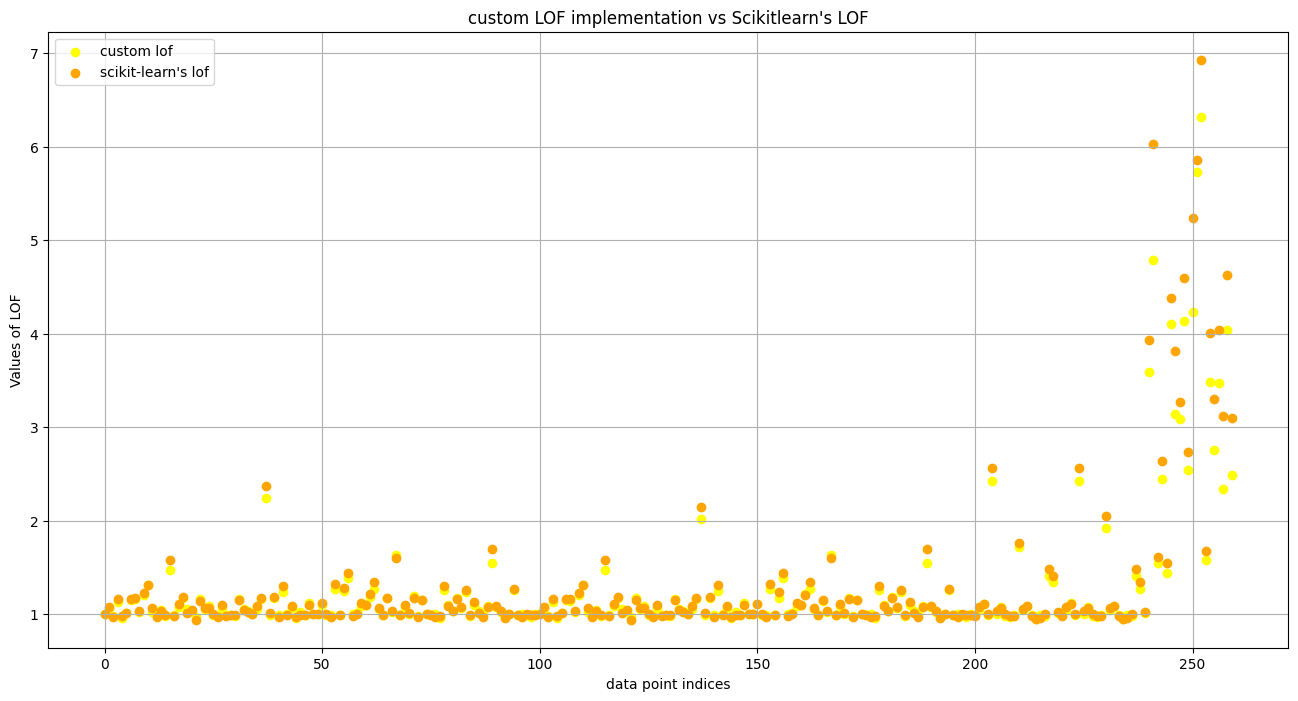

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

X = np.r_[X_train, X_test, X_outliers]

# number of neighbor k 
k = 10  

# custom lof 
def compute_lof(X, k):
    # fit k-nn to find the k nearest neighbors, and get the distances and the indices for each point
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # compute k_distance for each point (the k-th nearest neighbor is the farthest, so we pick the last column since distances is in incr-order)
    k_distances = distances[:, -1] 
    
    # compute reacheable distance according to the formula in lab 3
    r_dist = np.zeros_like(distances)
    for i in range(X.shape[0]):
        for j in range(k):
            r_dist[i, j] = max(distances[i, j], k_distances[indices[i, j]])
    
    # compute local reacheability density for each point, according to the formula in lab 3
    lrd = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        lrd[i] = k / np.sum(r_dist[i])
    
    # compute local outlier factor for each point, again acording to the formula in lab 3
    lof = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        lof[i] = np.sum(lrd[indices[i]]) / (lrd[i] * k)
    
    return lof

# compute lof with our function
custom_lof = compute_lof(X, k)

# compute lof with scikitlearn's lof
sk_lof = LocalOutlierFactor(n_neighbors=k)
sk_lof.fit(X)
lof_builtin = -sk_lof.negative_outlier_factor_

# plotting lof values using both implementation
plt.figure(figsize=(16,8))
plt.scatter(range(len(custom_lof)), custom_lof, label="custom lof", color="yellow")
plt.scatter(range(len(lof_builtin)), lof_builtin, label="scikit-learn's lof", color="orange")
plt.xlabel("data point indices")
plt.ylabel("Values of LOF")
plt.title("custom LOF implementation vs Scikitlearn's LOF")
plt.grid()
plt.legend()
plt.show()


### Investigate and propose a way to use LOF+IF
- Isolation forest IF generates an IF_index for each datapoint which measure the probability of that point being a global outlier
- LOF detects local outliers by computing the LOF score and deciding if it's an outlier based on the closeness to 1.

- To introduce IF in the computation of LOF we could reinforce the global LOF score if IF_index indicates that the datapoint is more likely an outliern and on the other hand attenuate the global LOF score if IF_index indicates that the datapoint is more likely to be an inlinern like so : 

$$ LOF\_global = LOF_{i}.IF_{i}^{\lambda}$$

- with IF_index normalized in $[0,1]$
- $\lambda$ the ponderation parameter, adjusting the weight of IF_index in the global score.

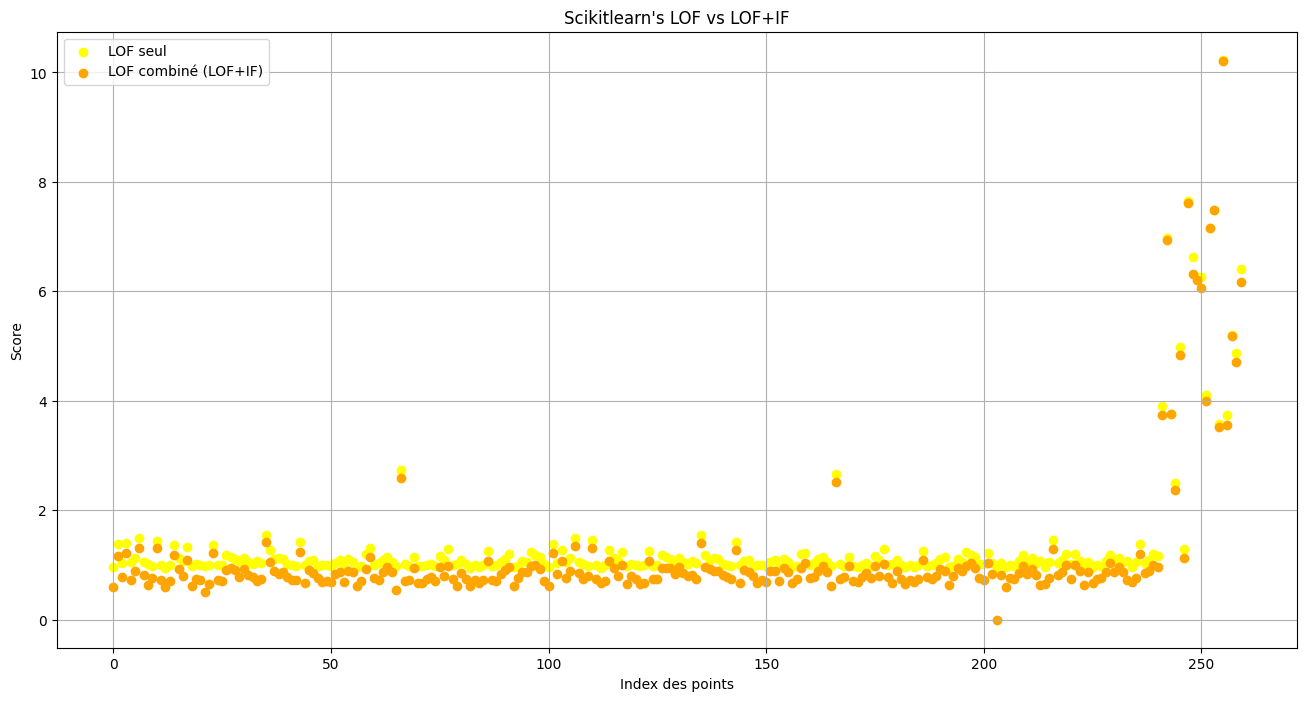

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

X = np.r_[X_train, X_test, X_outliers]

# compute IF scores/index
IF = IsolationForest(contamination=0.1, random_state=42)
IF_index = -IF.fit_predict(X)  
IF_score = -IF.decision_function(X) 

# normalize IF_index
scaler = MinMaxScaler()
IF_index_norm = scaler.fit_transform(IF_score.reshape(-1, 1)).flatten()

# compute lof using scikitlearn's implementation
lof_model = LocalOutlierFactor(n_neighbors=10)
LOF_score = -lof_model.fit_predict(X) 
LOF_index = -lof_model.negative_outlier_factor_ 

# compute combined score 
lamdba = 0.1  # ponderation of IF_index
LOF_combined = LOF_index * (IF_index_norm ** lamdba)

# plotting
plt.figure(figsize=(16, 8))
plt.scatter(range(len(X)), LOF_index, label="LOF seul", color="yellow")
plt.scatter(range(len(X)), LOF_combined, label="LOF combiné (LOF+IF)", color="orange")
plt.xlabel("Index des points")
plt.ylabel("Score")
plt.title("Scikitlearn's LOF vs LOF+IF")
plt.legend()
plt.grid()
plt.show()


### Demonstration with multiple examples comparing LOF,IF and LOF+IF

/tmp/ipykernel_9319/901359267.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


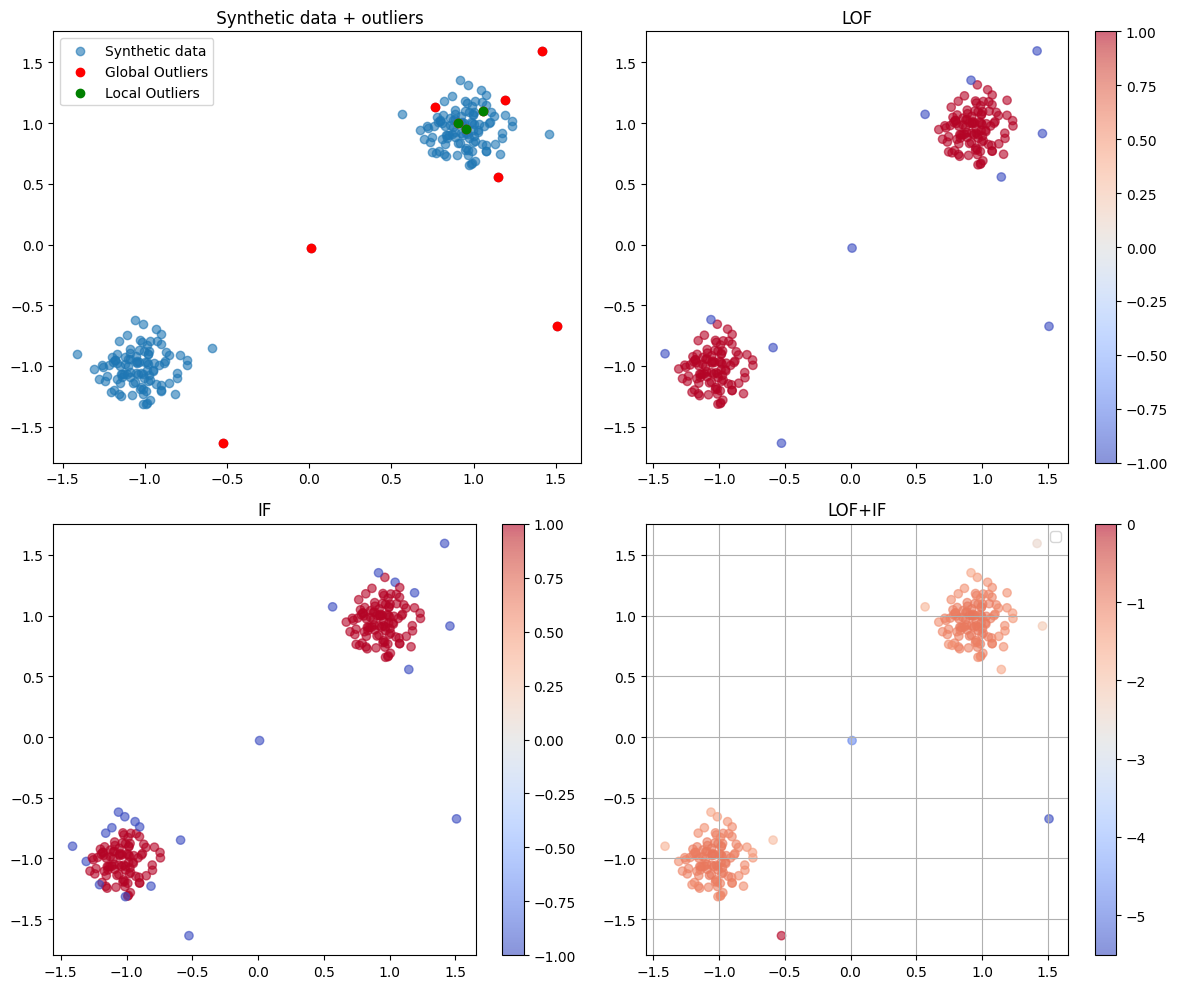

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np

# generate random data
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)

# generate global outliers
X_outliers_global = rng.uniform(low=-4, high=4, size=(10, 2))

# generate local outliers
X_outliers_local = np.array([[2, 2], [2.2, 2.3], [1.9, 2.1]])

# concatenate synthetic data + global outlier + local outlier
X = np.concatenate([X_normal + 2, X_normal - 2, X_outliers_global, X_outliers_local])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# applying LOF
lof_model = LocalOutlierFactor(n_neighbors=20)
lof_predictions = lof_model.fit_predict(X_scaled)

# applying IF
iso_forest = IsolationForest(contamination=0.1, random_state=42)
if_predictions = iso_forest.fit_predict(X_scaled)

# compute IF score and normalize it
if_scores = iso_forest.decision_function(X_scaled)
scaler_if = MinMaxScaler()
IF_index_norm = scaler_if.fit_transform(if_scores.reshape(-1, 1)).flatten()


# compute combined score (lof_combined = LOF * IF^(lambda))
LOF_index = lof_model.negative_outlier_factor_
lamdba = 0.1  # ponderation of IF_index
LOF_combined = LOF_index * (IF_index_norm ** lamdba)

# visualisation
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# plotting synthetic data
axs[0, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], label="Synthetic data", alpha=0.6)
axs[0, 0].scatter(X_scaled[-len(X_outliers_global):, 0], X_scaled[-len(X_outliers_global):, 1], color='r', label="Global Outliers")
axs[0, 0].scatter(X_scaled[-len(X_outliers_local):, 0], X_scaled[-len(X_outliers_local):, 1], color='g', label="Local Outliers")
axs[0, 0].legend()
axs[0, 0].set_title(" Synthetic data + outliers")

# plotting lof approach
scatter_lof = axs[0, 1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=lof_predictions, cmap='coolwarm', alpha=0.6)
axs[0, 1].set_title("LOF")
fig.colorbar(scatter_lof, ax=axs[0, 1], orientation='vertical')

# plotting IF approach
scatter_if = axs[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=if_predictions, cmap='coolwarm', alpha=0.6)
axs[1, 0].set_title("IF")
fig.colorbar(scatter_if, ax=axs[1, 0], orientation='vertical')

# plotting hybrid (lof+if)
scatter_hybride = axs[1, 1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=LOF_combined, cmap='coolwarm', alpha=0.6)
axs[1, 1].set_title("LOF+IF")
fig.colorbar(scatter_hybride, ax=axs[1, 1], orientation='vertical')


plt.tight_layout()
plt.grid()
plt.legend()
plt.show()




## Exercise 4 - [45%]

As opposed to bottom-up clustering approaches, a top-down method starts with one cluster -a model with one component- and tries incrementally to increase the number of clusters by introducing and fitting more components in the model. The general algorithm goes as follows:

* **Initialization:** start with $k$=1 component model, $M_k$
* **Step 1:** fit the model $M_k$
* **Step 2:** find a good way to introduce and initialize a new component; set $k=k+1$ and go to Step 1 

There are many ways to make more specific the steps of this process. 

**Model:** one can pick a cluster model, e.g. a centroid-based like that of k-means, or a probabilistic model like the Gaussian Mixture Models (GMM). In both cases an iterative approach takes place when fitting such a model.

**Incremental step:** Most importantly, one needs to decide about how Step 2 operates. Indicative options originally expressed using $k$-means are:
* **Bisecting:** This approach chooses one cluster and splits it in two parts. The criterion of which cluster to pick varies; one simple way is to choose the cluster with the largest error (or average error). In the case of k-means, which uses a hard assignment of points to clusters, this is: 
    - B1) Initialize a second centroid using a random point of the cluster.
    - B2) Run a 2-means inside the cluster using only the points of that cluster. 
    - B3) (Optionally) A full k-means fine-tuning to update all the $k+1$ clusters can be performed. 
    Note that, if step B3 is not involved, 2 of the centroids are the product of the cluster splitting, while the rest come untouched from the previous $k$-order solution.
* **Global:** In its greedy version (see if needed the reference), this approach examines as the ($k+1$)-th centroid every of the $N$ points of the dataset, and in each case it fits a different $k+1$ model with ($k+1$)-means. Out of all the $N$ trials, it chooses the model that produced the maximal reduction of the clustering error (in fact it doesn't need to store the models, but only to rerun the best case found).
* **Fast Global:** It is a variation of Global k-means that initializes the $k+1$-th centroid with the point that achieves the largest reduction of error only after one k-means update, i.e. after considering it as new centroid and looking which other points would be assigned to that new cluster, and without iterating further till convergence.
* **Global++:** Instead of checking all $N$ points as candidates for initializing the $k+1$-th centroid, here the k-means++ principle is used. Specifically, the $k+1$ centroid is initialized by choosing at random one point based on the distribution of the inverse sum of distances of each point to the $k$ computed centroids. This should be repeated $m<N$ times (where $m$ is a parameter, e.g. $m=\lfloor 0.1*N \rfloor$) and pick the best choice.

**Recipe to prepare**

Consider that the final number of clusters $k^*$ is known in each case. First, use $k$-means as base algorithm, then extend to GMM as described below.

**a)** Implement the greedy global incremental, the fast global, and the global++ variations.

**b)** Which property of the solution produced by the bisecting variation does not hold any more, when including Step B3 and after applying it? Compare with the global incremental approach with regards to the same property?

**c)** Run experiments for the color clustering application we saw in the course (with given $k^*$ as in that example).

**d)** Construct a random synthetic dataset as follows. Consider a 5-by-5 2D grid arrangement of 25 clusters: i.e. the mean of the 1st cluster will be at (0,5), the 2nd at (1,5),..., the 6th at (0,4),..., the 25th at (5,0)). Each cluster will have $N=50$ points in 2D generated by a Gaussian distribution, with fixed $\sigma$ for all clusters (test values $\sigma = ${0.1, 0.5, 0.7, 1}). Run experiments with all your implementations (i.e. flat GMM training with fixed $k$; incremental GMM training with bisecting splits; incremental GMM training based on the global principle). Provide summaries of results about the clustering error and detailed comments with your observations/interpretations about the performance of the methods.

**e)** Now, extend your toolbox by also considering the GMM as base algorithm. You will need a piece of code implementing the GMM training with a fixed $k$ using the Expectation-Maximization (EM) algorithm. 

**f)** What is the main problem of applying the bisecting principle in the GMM case? Find a heuristic workaround to adapt it to this probabilistic cluster model.

**References:** 
- A. Likas et al., [The global k-means algorithm](https://hal.inria.fr/inria-00321515/document). Pattern Recognition, 2003.
- G. Vardakas et al., [Global k-means++: an effective relaxation of the global k-means clustering algorithm](https://arxiv.org/pdf/2211.12271), 2022.

## Solution Exercice 4

### a) Implementation of the incremental step using k-means as base with different approach

#### Greedy global incremental

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def greedy_global(X, kmax):
    # parameters initialisation 
    n_samples, n_features = X.shape
    k = 1 # starting with k=1 
    model = KMeans(n_clusters=k, random_state=12).fit(X) # fitting the base model
    centroids = model.cluster_centers_ # getting the fitted centroids
    
    # repeat until known k* = kmax reached
    while k < kmax:
        # initilize error and actual best centroid found
        min_error = np.inf
        best = None

        # iterate through each point of the dataset and use it as a new centroid
        for i in range(n_samples):
            # point i is the new centroid candidate
            current = np.vstack([centroids, X[i]])
            
            # fit a new k-means with the current centroid , a (k+1)
            current_model = KMeans(n_clusters=k+1, init=current, n_init=1, random_state=12).fit(X)
            current_error = current_model.inertia_  # get computed error (sum of squared distances)
            
            # check if current error is less than minimum error found until now
            if current_error < min_error:
                min_error = current_error
                best = X[i]
        
        # best centroid found is added 
        centroids = np.vstack([centroids, best])
        k += 1 # increment k
        
        # refit with the new added centroid 
        model = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=12).fit(X)
    
    return model



# generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=12, cluster_std=1.0)
# k* known number of cluster 
kmax = 5  
# appying greedy-global approach with with k* known as kmax= 5
final_model = greedy_global(X, kmax)

# printing centroids
print("Centroids :")
print(final_model.cluster_centers_)


Centroids :
[[ 8.08431412 -9.46067808]
 [-4.90028764  0.4208315 ]
 [-6.12893922  4.72864028]
 [-9.5057816   8.36027648]
 [-7.96687019  4.53144298]]


#### Fast global approach


In [4]:
import numpy as np
from sklearn.cluster import KMeans

def fast_global(X, kmax):
    # parameters initialisation 
    n_samples, n_features = X.shape
    k = 1 # starting with k=1 
    model = KMeans(n_clusters=k, random_state=12).fit(X) # fitting the base model
    centroids = model.cluster_centers_ # getting the fitted centroids

    while k < kmax:
        # initilize error and actual best centroid found
        min_error = np.inf
        best = None

        # iterate through each point of the dataset and use it as a new centroid
        for i in range(n_samples):
            # point i is the new centroid candidate
            current = np.vstack([centroids, X[i]])
            
            # perform one iteration of k-means
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - current, axis=2), axis=1)
            
            # compute new error SS^2
            current_error = 0
            for cluster_idx in range(k + 1):
                points_in_cluster = X[labels == cluster_idx]
                if len(points_in_cluster) > 0:
                    centroid = points_in_cluster.mean(axis=0)
                    current_error += np.sum((points_in_cluster - centroid) ** 2)
            
            # update if this candidate reduces the error
            if current_error < min_error:
                min_error = current_error
                best = X[i]
        
        # best centroid found is added 
        centroids = np.vstack([centroids, best])
        k += 1 # increment k
        
        # refit with the new added centroid 
        model = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=12).fit(X)
    
    return model


# generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=12, cluster_std=1.0)
# k* known number of cluster 
kmax = 5  
# appying fast global approach with with k* known as kmax= 5
final_model = fast_global(X, kmax)

# printing centroids
print("Centroids :")
print(final_model.cluster_centers_)


Centroids :
[[-4.90028764  0.4208315 ]
 [ 8.08431412 -9.46067808]
 [-9.5057816   8.36027648]
 [-6.1536175   4.73689344]
 [-7.99189371  4.51593346]]


#### Global++ approach

In [26]:
import numpy as np
from sklearn.cluster import KMeans

def global_pp(X, kmax):

    # parameters initialisation 
    n_samples, n_features = X.shape
    proportion = max(1, n_samples // 10) # proportion of the dataset to use as subset for m
    k = 1
    model = KMeans(n_clusters=k, random_state=12).fit(X)# fitting the base model
    centroids = model.cluster_centers_ # getting the fitted centroids
    
    while k < kmax:
        # compute each point's distance to closest centroid
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        # compute probabilty for sampling m
        probability = distances / np.sum(distances) 
        # sample proportion candidate 
        m = np.random.choice(n_samples, size=proportion, replace=False, p=probability)
        # initilize error and actual best centroid found
        min_error = np.inf
        best = None
        
        # iterate through all points of the subset m
        for j in m:
            current = np.vstack([centroids, X[j]])
            # run one k-mean iteration
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - current, axis=2), axis=1)
            # compute error SS
            current_error = 0
            for i in range(k + 1):
                current_cluster_size = X[labels == i]
                if len(current_cluster_size) > 0:
                    centroid = current_cluster_size.mean(axis=0)
                    current_error += np.sum((current_cluster_size - centroid) ** 2)
            
            # update best candidate if current candidate reduces the min error
            if current_error < min_error:
                min_error = current_error
                best = X[j]
        
        # best centroid found is added 
        centroids = np.vstack([centroids, best])
        k += 1 # increment k
        
        # refit with the new added centroid 
        model = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=12).fit(X)
    
    
    return model


# generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=12, cluster_std=1.0)
# k* known number of cluster 
kmax = 5  
# appying global pp approach with with k* known as kmax= 5
final_model = global_pp(X, kmax)

# printing centroids
print("Centroids :")
print(final_model.cluster_centers_)


Centroids :
[[ -4.89172627   0.45940487]
 [  7.44889478  -8.95234986]
 [ -9.51294029   8.32150537]
 [ -6.99370474   4.64399322]
 [  8.81050766 -10.04162463]]


### b) Which property of the solution produced by the bisecting does not hold any more when including step B3 and after applying it, compare with the global incremental approach with regards to the same property

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def bisecting_kmeans(X, kmax, step3=True):
    # parameter initialisation
    n_samples, n_features = X.shape
    k = 1 # starting with k=1 
    clusters = [X] 
    centroids = [np.mean(X, axis=0).tolist()]  # initial centroid
    
    while k < kmax:
        # initialize error , cluster to split and it's id
        max_error = -np.inf
        s_cluster = None
        cluster_idx = -1
        
        for idx, cluster in enumerate(clusters):
            # fit model and compute that cluster's error 
            model = KMeans(n_clusters=1, random_state=12).fit(cluster)
            cluster_error = model.inertia_
            if cluster_error > max_error:
                max_error = cluster_error
                s_cluster = cluster
                cluster_idx = idx
        
        # split the given cluster into two sub clusters
        model_split = KMeans(n_clusters=2, random_state=12).fit(s_cluster)
        subclusters = [s_cluster[model_split.labels_ == 0], s_cluster[model_split.labels_ == 1]]
        new_centroids = model_split.cluster_centers_.tolist()
        
        # replcaing splitted cluster with the 2 new
        clusters.pop(cluster_idx)
        clusters.extend(subclusters)
        centroids.pop(cluster_idx)
        centroids.extend(new_centroids)
        
        # fine tunnig (step 3)
        if step3:
            k += 1
            model = KMeans(n_clusters=k, init=np.array(centroids), n_init=1, random_state=12).fit(X)
            centroids = model.cluster_centers_.tolist()
        else:
            k += 1

    # fit final model
    model = KMeans(n_clusters=k, init=np.array(centroids), n_init=1, random_state=12).fit(X)
    return model

# generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=12, cluster_std=1.0)
kmax = 5

# compute bisecting k-means with optionnal step 3
model_1 = bisecting_kmeans(X, kmax, step3=True)
# compute bisecting k-means withoutoptionnal step 3
model_2 = bisecting_kmeans(X, kmax, step3=False)

# printing found centroids
print("Centroids with step 3:")
print(model_1.cluster_centers_)
print("\nCentroids without step 3 :")
print(model_2.cluster_centers_)


Centroids with step 3:
[[ 8.08431412 -9.46067808]
 [-9.5057816   8.36027648]
 [-7.21403358  4.76772435]
 [-5.34941283  1.90009286]
 [-4.64966391 -0.06558909]]

Centroids without step 3 :
[[ 8.08431412 -9.46067808]
 [-9.5057816   8.36027648]
 [-7.21403358  4.76772435]
 [-5.34941283  1.90009286]
 [-4.64966391 -0.06558909]]


The global approach minimises the global error by introducing the new centroids in a greedy way, so the final centroids does not follow a hierarchical structure , like the bisecting approach without fine tuning but are more oriented towards reducing the global error considering all the datapoints, the same behaviour goes for the bisecting when fine tuning is applied.

So by adding step 3 in the bisecting approach, it modifies the hierarchical and local nature of fited clusters, and the final solution is more of a global optimisation.

Comparing to global incremental , both approach of bisecting (with and without fine tunning), tries to minimise the error, however the global approach doesn't follow a hierarchical structure, bisecting without fine tunning does.

### c) Test on color clustering 


##### Greedy global


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image, make_blobs
from sklearn.utils import shuffle
from time import time


def greedy_global(X, kmax):
    # parameters initialisation 
    n_samples, n_features = X.shape
    k = 1 # starting with k=1 
    model = KMeans(n_clusters=k, random_state=12).fit(X) # fitting the base model
    centroids = model.cluster_centers_ # getting the fitted centroids
    
    # repeat until known k* = kmax reached
    while k < kmax:
        # initilize error and actual best centroid found
        min_error = np.inf
        best = None

        # iterate through each point of the dataset and use it as a new centroid
        for i in range(n_samples):
            # point i is the new centroid candidate
            current = np.vstack([centroids, X[i]])
            
            # fit a new k-means with the current centroid , a (k+1)
            current_model = KMeans(n_clusters=k+1, init=current, n_init=1, random_state=12).fit(X)
            current_error = current_model.inertia_  # get computed error (sum of squared distances)
            
            # check if current error is less than minimum error found until now
            if current_error < min_error:
                min_error = current_error
                best = X[i]
        
        # best centroid found is added 
        centroids = np.vstack([centroids, best])
        k += 1 # increment k
        
        # refit with the new added centroid 
        model = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=12).fit(X)
    
    return model

# Load the image
china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / 255  # Normalize
w, h, d = original_shape = tuple(china.shape)
image_array = np.reshape(china, (w * h, d))  # Flatten image to 2D array

n_colors = 2 # Number of colors for quantization

# applying greedy global
print("Applying greedy global algorithm...")
t0 = time()
global_model = greedy_global(image_array, n_colors)
print("Done in %0.3fs." % (time() - t0))

# Recreate the quantized image
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Predict labels for all pixels
print("Predicting labels for the full image...")
t0 = time()
labels_global = global_model.predict(image_array)
print("Done in %0.3fs." % (time() - t0))

# Reconstruct and display the quantized image
quantized_global = recreate_image(global_model.cluster_centers_, labels_global, w, h)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, Global Incremental)')
plt.imshow(quantized_global)
plt.show()


##### fast global


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

def fast_global(X, kmax):
    # parameters initialisation 
    n_samples, n_features = X.shape
    k = 1 # starting with k=1 
    model = KMeans(n_clusters=k, random_state=12).fit(X) # fitting the base model
    centroids = model.cluster_centers_ # getting the fitted centroids

    while k < kmax:
        # initilize error and actual best centroid found
        min_error = np.inf
        best = None

        # iterate through each point of the dataset and use it as a new centroid
        for i in range(n_samples):
            # point i is the new centroid candidate
            current = np.vstack([centroids, X[i]])
            
            # Perform one iteration of k-means
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - current, axis=2), axis=1)
            
            # compute new error SS^2
            current_error = 0
            for cluster_idx in range(k + 1):
                points_in_cluster = X[labels == cluster_idx]
                if len(points_in_cluster) > 0:
                    centroid = points_in_cluster.mean(axis=0)
                    current_error += np.sum((points_in_cluster - centroid) ** 2)
            
            # update if this candidate reduces the error
            if current_error < min_error:
                min_error = current_error
                best = X[i]
        
        # best centroid found is added 
        centroids = np.vstack([centroids, best])
        k += 1 # increment k
        
        # refit with the new added centroid 
        model = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=12).fit(X)
    
    return model

n_colors = 16

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

# apply fast global approach
print("Applying Fast Global algorithm...")
t0 = time()
fast_global_model = fast_global(image_array, n_colors)
print("Done in %0.3fs." % (time() - t0))

# recreate the quantized image
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image



print("Predicting labels for the full image...")
t0 = time()
labels_fast_global = fast_global_model.predict(image_array)
print("Done in %0.3fs." % (time() - t0))

# reconstruct and display the quantized image
quantized_fast_global = recreate_image(fast_global_model.cluster_centers_, labels_fast_global, w, h)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, Fast Global)')
plt.imshow(quantized_fast_global)
plt.show()


##### global ++

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

def global_pp(X, kmax):

    # parameters initialisation 
    n_samples, n_features = X.shape
    proportion = max(1, n_samples // 10) # proportion of the dataset to use as subset for m
    k = 1
    model = KMeans(n_clusters=k, random_state=12).fit(X)# fitting the base model
    centroids = model.cluster_centers_ # getting the fitted centroids
    
    while k < kmax:
        # compute each point's distance to closest centroid
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        # compute probabilty for sampling m
        probability = distances / np.sum(distances) 
        # Sample proportion candidate points based on the probability
        m = np.random.choice(n_samples, size=proportion, replace=False, p=probability)
        # initilize error and actual best centroid found
        min_error = np.inf
        best = None
        
        # iterate through all points of the subset m
        for j in m:
            current = np.vstack([centroids, X[j]])
            # run one k-mean iteration
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - current, axis=2), axis=1)
            # compute error SS^2
            current_error = 0
            for i in range(k + 1):
                current_cluster_size = X[labels == i]
                if len(current_cluster_size) > 0:
                    centroid = current_cluster_size.mean(axis=0)
                    current_error += np.sum((current_cluster_size - centroid) ** 2)
            
            # update best candidate if current candidate reduces the min error
            if current_error < min_error:
                min_error = current_error
                best = X[j]
        
        # best centroid found is added 
        centroids = np.vstack([centroids, best])
        k += 1 # increment k
        
        # refit with the new added centroid 
        model = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=12).fit(X)
    
    
    return model

n_colors = 16

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

# apply global++ approach
print("Applying Global++ algorithm...")
t0 = time()
global_pp_model = global_pp(image_array, n_colors)
print("Done in %0.3fs." % (time() - t0))

# recreate the quantized image
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Predict labels for all pixels
print("Predicting labels for the full image...")
t0 = time()
labels_global_pp = global_pp_model.predict(image_array)
print("Done in %0.3fs." % (time() - t0))

# reconstruct and display the image
quantized_global_pp = recreate_image(global_pp_model.cluster_centers_, labels_global_pp, w, h)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, Global++)')
plt.imshow(quantized_global_pp)
plt.show()


#### d) Construting the dataset and testing it with different approaches
#### Flat GMM




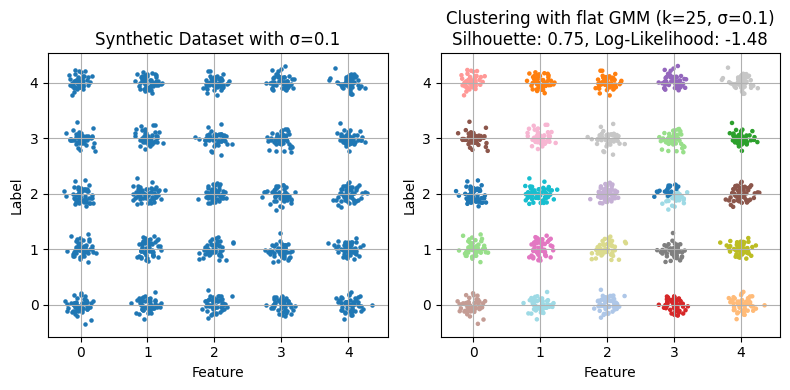

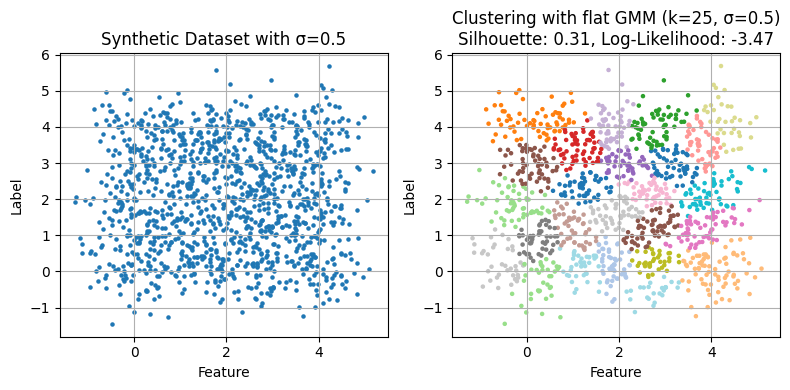

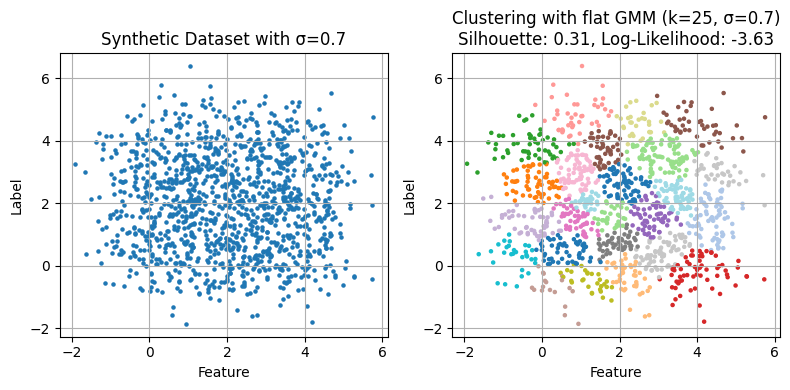

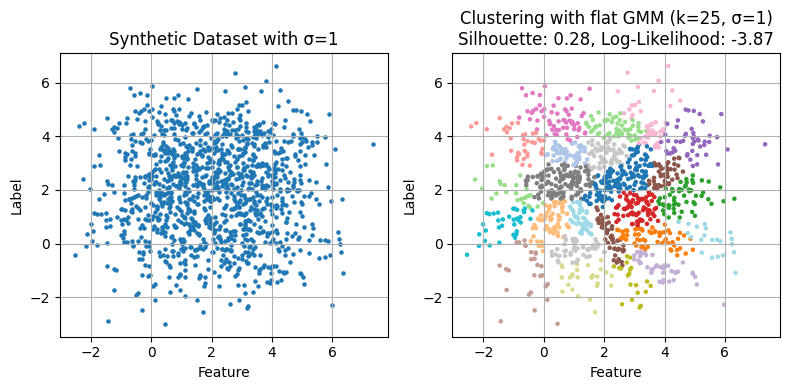

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


# generate the dataset following the given setup
def generate_dataset(grid_size=5, N=50, sigma=0.1):
    clusters = []
    for i in range(grid_size):
        for j in range(grid_size):
            # mean for the cluster
            mean = np.array([j, grid_size - 1 - i])
            # generate N points for this cluster
            cluster_points = np.random.normal(mean, sigma, size=(N, 2))
            clusters.append(cluster_points)
    return np.vstack(clusters)

def flat_gmm(X, k):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0)
    gmm.fit(X)
    return gmm

sigmas = [0.1, 0.5, 0.7, 1]
for i in sigmas:
    X = generate_dataset(grid_size=5, N=50, sigma=i)
    k_fixed = 25
    gmm_model = flat_gmm(X, k_fixed) # train gmm model
    labels = gmm_model.predict(X) # predict

    silhouette_avg = silhouette_score(X, labels)  # silhouette score
    log_likelihood = gmm_model.score(X)  # average log-likelihood

    # plotting the dataset
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].scatter(X[:, 0], X[:, 1], s=5)
    axes[0].set_title(f"Synthetic Dataset with σ={i}")
    axes[0].set_xlabel("Feature")
    axes[0].set_ylabel("Label")
    axes[0].grid()

    # plotting the resulting clusters
    scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=5)
    axes[1].set_title(f"Clustering with flat GMM (k={k_fixed}, σ={i})\n"f"Silhouette: {silhouette_avg:.2f}, Log-Likelihood: {log_likelihood:.2f}")
    axes[1].set_xlabel("Feature")
    axes[1].set_ylabel("Label")
    axes[1].grid()
    fig.tight_layout()
    plt.show()



#### Incremental bisecting

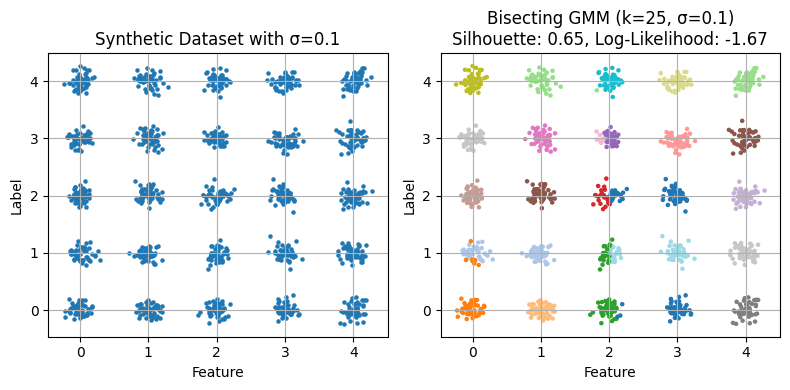

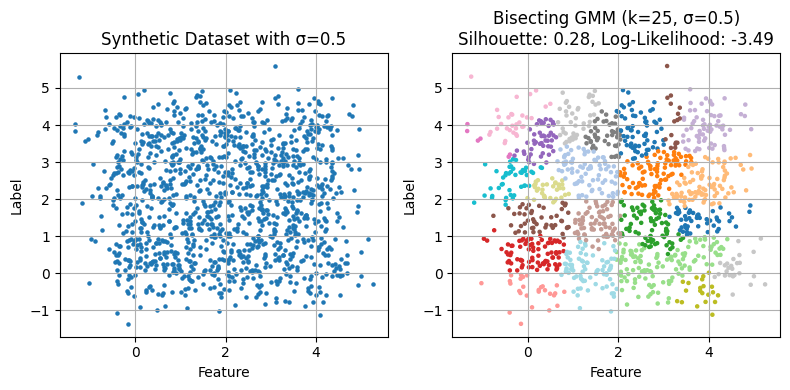

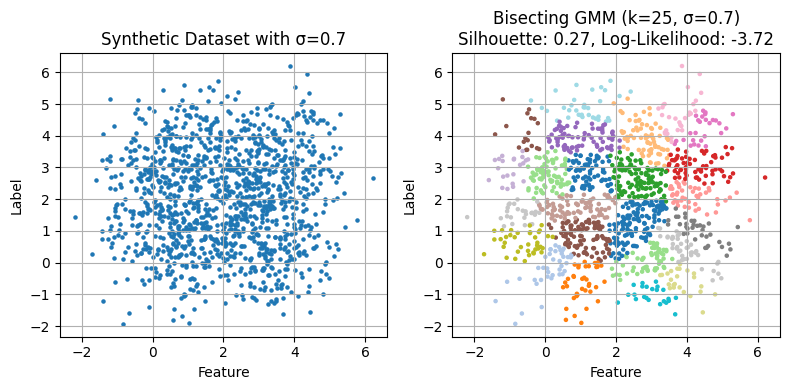

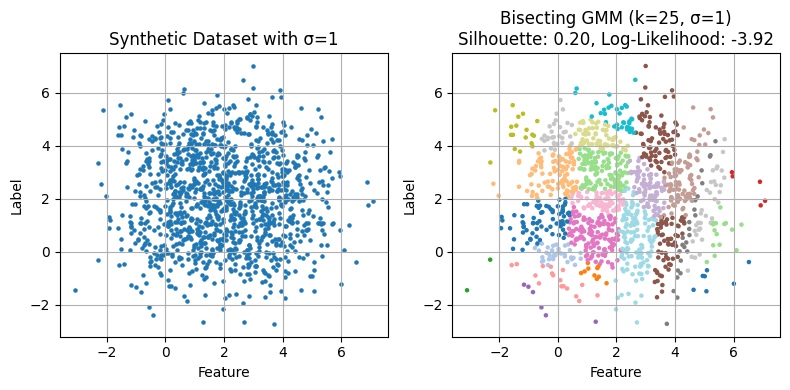

In [14]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

def bisecting_gmm(X, max):

    n_samples = X.shape[0]
    # fit base GMM k=1
    current_gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    current_gmm.fit(X)
    clusters = [X]  
    models = [current_gmm]  # list of partial fitted GMM models
    
    while len(models) < max:
        # find the cluster with the lowest log-likelihood 
        current_error = [model.score_samples(cluster).mean() for model, cluster in zip(models, clusters)]
        # get this cluster
        current_model = np.argmin(current_error)  
        # split it
        s_cluster = clusters.pop(current_model)
        s_model = models.pop(current_model)
        
        # fit a GMM with 2 datapoints of the cluster to split 
        if s_cluster.shape[0] < 2:
            # skip if it has less than 2 datapoints
            clusters.append(s_cluster)
            models.append(s_model)
            continue
        
        new_gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
        new_gmm.fit(s_cluster)
        labels = new_gmm.predict(s_cluster)
        
        # create two new clusters and corresponding models
        new_clusters = [s_cluster[labels == i] for i in range(2)]
        # ensure new clusters have at least 2 points
        valid_clusters = [c for c in new_clusters if len(c) > 1]
        
        if len(valid_clusters) == 2:
            clusters.extend(valid_clusters)
            models.extend([GaussianMixture(n_components=1, covariance_type='full', random_state=0).fit(c) for c in valid_clusters])
        else:
            # re-add the original cluster if splitting fails
            clusters.append(s_cluster)
            models.append(s_model)
    
    # combine all partial models into a final GMM
    final_gmm = GaussianMixture(n_components=max, covariance_type='full', random_state=0)
    final_gmm.means_ = np.vstack([model.means_ for model in models])
    final_gmm.covariances_ = np.array([model.covariances_[0] for model in models])
    final_gmm.weights_ = np.array([len(cluster) / n_samples for cluster in clusters])
    final_gmm.precisions_cholesky_ = np.array([np.linalg.cholesky(np.linalg.inv(cov)) for cov in final_gmm.covariances_])
    
    return final_gmm


sigmas = [0.1, 0.5, 0.7, 1]
for sigma in sigmas:
    X = generate_dataset(grid_size=5, N=50, sigma=sigma)
    max = 25
    gmm_model = bisecting_gmm(X, max)
    labels = gmm_model.predict(X)
    
    # compute log-likelihood
    silhouette_avg = silhouette_score(X, labels)
    log_likelihood = gmm_model.score(X)
    
    # plotting 
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].scatter(X[:, 0], X[:, 1], s=5)
    axes[0].set_title(f"Synthetic Dataset with σ={sigma}")
    axes[0].set_xlabel("Feature")
    axes[0].set_ylabel("Label")
    axes[0].grid()
    scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=5)
    axes[1].set_title(f"Bisecting GMM (k={max}, σ={sigma})\n" f"Silhouette: {silhouette_avg:.2f}, Log-Likelihood: {log_likelihood:.2f}")
    axes[1].set_xlabel("Feature")
    axes[1].set_ylabel("Label")
    axes[1].grid()
    fig.tight_layout()
    plt.show()


#### Incremental based on global principle

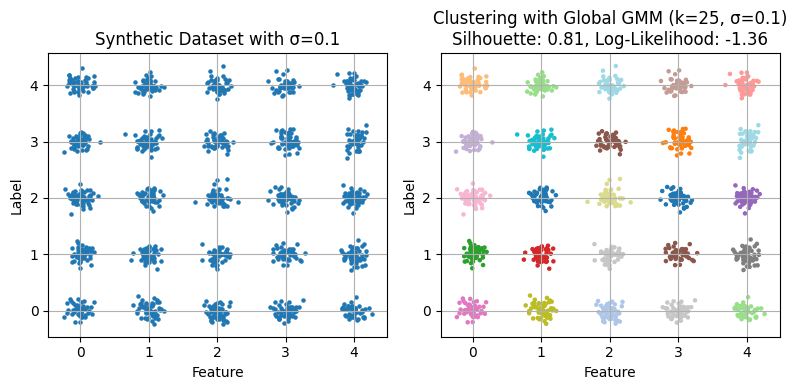

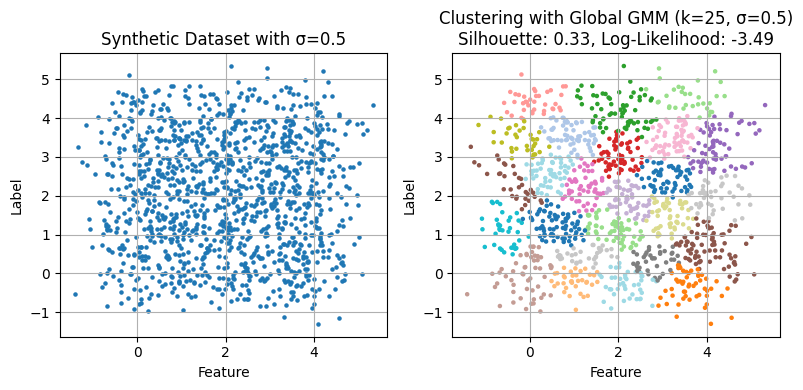

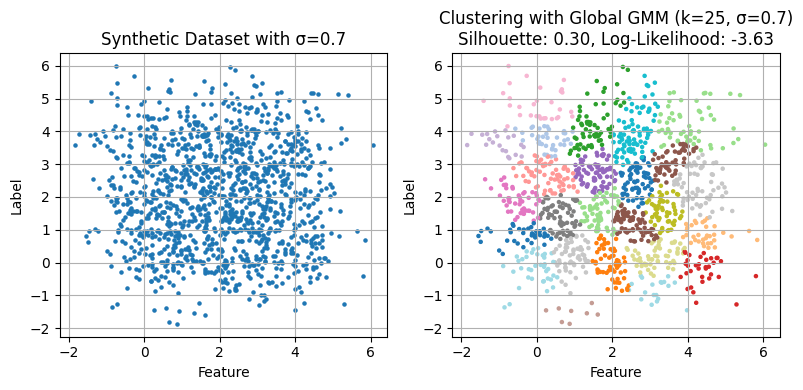

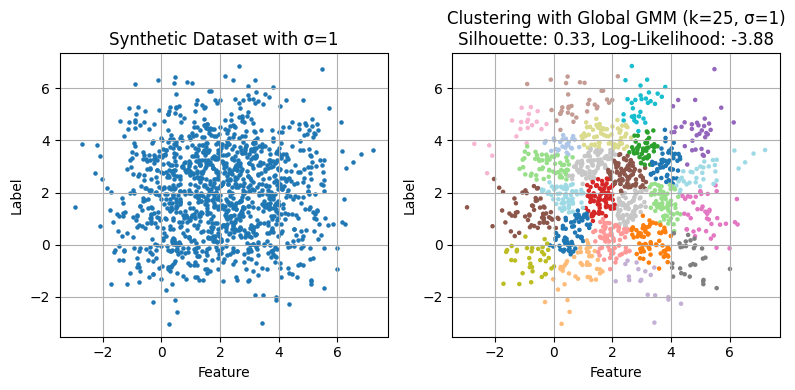

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# incremental GMM based on global principle
def incremental_global_gmm(X, kmax):
    # initialisation parameters
    n_samples, n_features = X.shape
    k = 1  
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0)
    gmm.fit(X)  # fit base model 
    centroids = gmm.means_  # get initial centroid 
    

    while k < kmax:
        # compute distance to closest centroid
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
     
        # compute probability of each point of being the next centroid
        probability = distances / np.sum(distances)
        
        # select point based on probability
        index = np.random.choice(n_samples, size=1, replace=False, p=probability)
        new_centroid = X[index]
        centroids = np.vstack([centroids, new_centroid])
        k += 1  

        # re train GMM with updated centroids
        gmm = GaussianMixture(n_components=k, covariance_type='full', init_params='kmeans', random_state=0)
        gmm.fit(X)
        
    # predict with final model
    labels = gmm.predict(X)
    
    return gmm, labels


sigmas = [0.1, 0.5, 0.7, 1]
for sigma in sigmas:
    X = generate_dataset(grid_size=5, N=50, sigma=sigma)
    kmax = 25
    
    # training
    gmm_model, labels = incremental_global_gmm(X, kmax)
    
    # compute silhouette and log-likelihood
    silhouette_avg = silhouette_score(X, labels)
    log_likelihood = gmm_model.score(X)
    
    # plotting
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].scatter(X[:, 0], X[:, 1], s=5)
    axes[0].set_title(f"Synthetic Dataset with σ={sigma}")
    axes[0].set_xlabel("Feature")
    axes[0].set_ylabel("Label")
    axes[0].grid()
    scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=5)
    axes[1].set_title(f"Clustering with Global GMM (k={kmax}, σ={sigma})\n"f"Silhouette: {silhouette_avg:.2f}, Log-Likelihood: {log_likelihood:.2f}")
    axes[1].set_xlabel("Feature")
    axes[1].set_ylabel("Label")
    axes[1].grid()
    fig.tight_layout()
    plt.show()



##### Observations

| Approach     | **$\sigma$**  | **Silhouette-score** | **Log-Likelihood** |
|--------------|--------------:|---------------------:|-------------------:|
| Flat-GMM      | **0.1**       |     **0.75**         |         **-1.48**  |
|               | **0.5**       |     **0.31**         |         **-3.47**  |
|               | **0.7**       |     **0.31**         |         **-3.63**  |
|               | **1**         |     **0.28**         |         **-3.87**  |
|Bissecting GMM | **0.1**       |     **0.65**         |         **-1.67**  |
|               | **0.5**       |     **0.28**         |         **-3.49**  |
|               | **0.7**       |     **0.27**         |         **-3.72**  |
|               | **1**         |     **0.20**         |         **-3.92**  |
|Global-Incr-GMM| **0.1**       |     **0.81**         |         **-1.36**  |
|               | **0.5**       |     **0.33**         |         **-3.49**  |
|               | **0.7**       |     **0.30**         |         **-3.63**  |
|               | **1**         |     **0.33**         |         **-3.88**  |

- for $\sigma = 0.1 $ : 
Clusters are well defined, not stacking on each other, inducing high silhouette score and low log-likelihood, the best fit is obtained using Global incremental approach, it efficiently chooses the centroids.

- for $\sigma = 0.5$ and $\sigma = 0.7$ :
Clusters are starting to overlap, reducing silhouette scores and log-likelihood, Global incremental is very similar to Flat GMM but is still ahead, bisecting provides the worst score.

- for $\sigma = 1$ :
Clusters are completely overlapping each others and are no longer distinguishable, the Global-Incremental-GMM still finishes on top , the log likelihood scores of all the approachs is quite bad and similar due to the complexity of the data in this case.


We can conclude that , Global-Inremental approach offers the best results for non overlapping data, for moderate overlapping Flat-GMM and Global Incr are both viable options, and when data is heavely overlapping , the choice of the approche doesnt really matters as they all struggle when the complexity rises.






#### GMM training with a fixed $k$ using the Expectation-Maximization (EM) algorithm

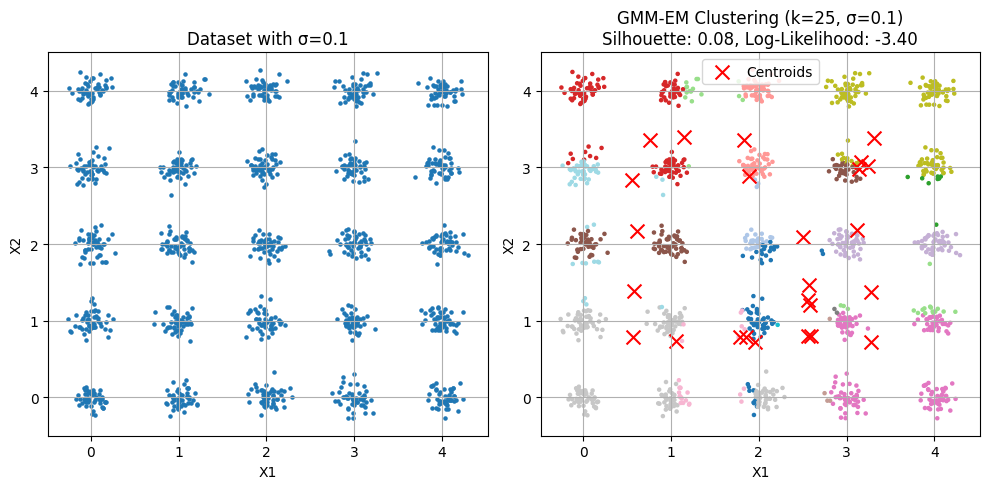

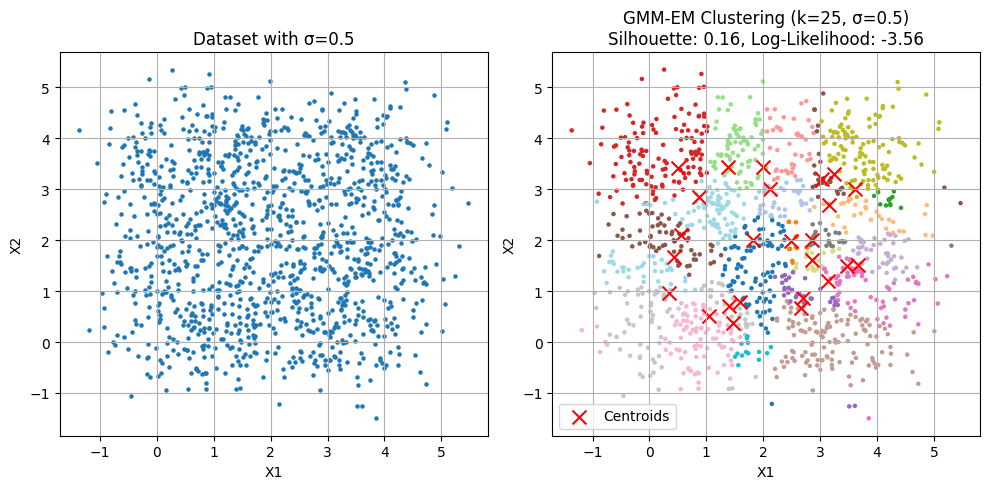

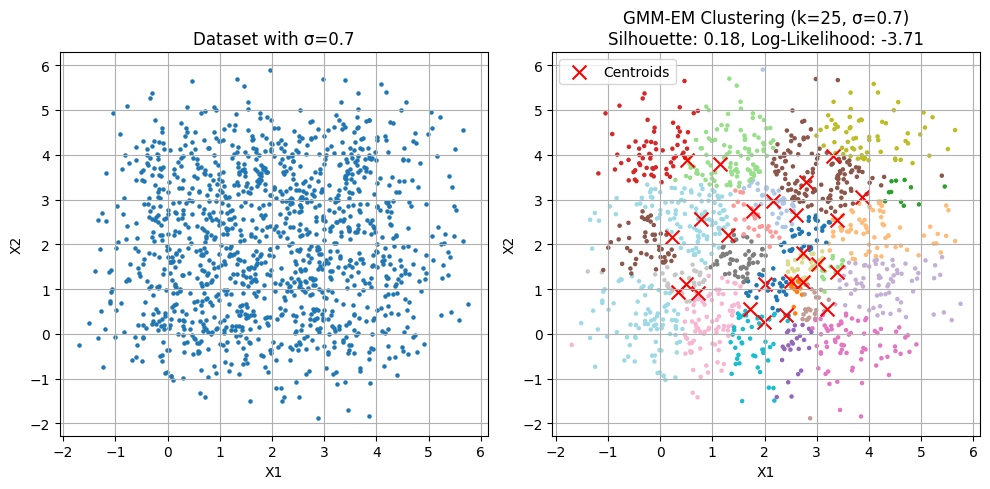

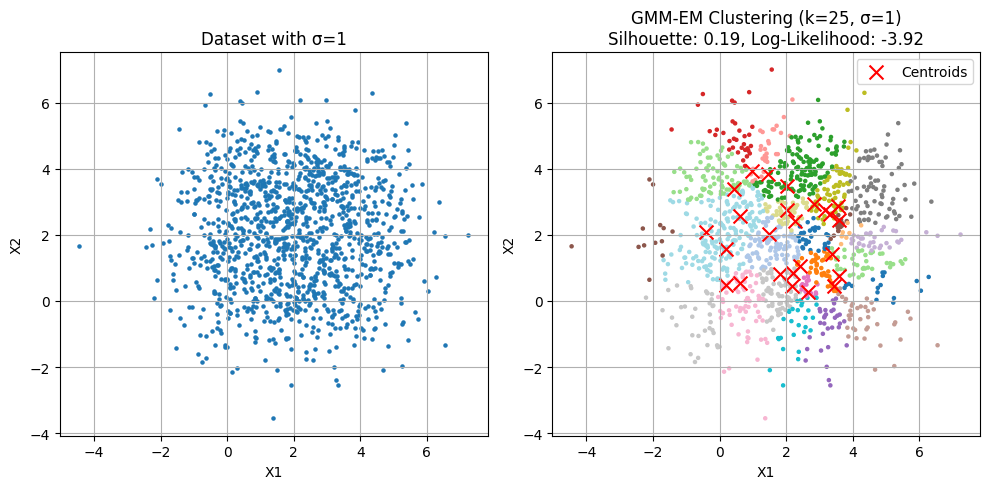

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal

class GMM_EM:
    def __init__(self, n_components, tol=1e-6, max_iter=100, random_state=None):
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.random_state = random_state
        self.weights_ = None
        self.means_ = None
        self.covariances_ = None

    def fit(self, X):
        # parameters initialisation 
        n_samples, n_features = X.shape
        rng = np.random.RandomState(self.random_state)
        self.weights_ = np.ones(self.n_components) / self.n_components
        self.means_ = X[rng.choice(n_samples, self.n_components, replace=False)]
        self.covariances_ = np.array([np.cov(X.T) for _ in range(self.n_components)])
        log_likelihood_old = -np.inf

        for _ in range(self.max_iter):
            # compute responsabilities
            responsibilities = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                rv = multivariate_normal(self.means_[k], self.covariances_[k], allow_singular=True)
                responsibilities[:, k] = self.weights_[k] * rv.pdf(X)
            responsibilities /= responsibilities.sum(axis=1, keepdims=True)

            # update weights means covariances
            N_k = responsibilities.sum(axis=0)
            self.weights_ = N_k / n_samples
            self.means_ = np.dot(responsibilities.T, X) / N_k[:, np.newaxis]
            self.covariances_ = np.zeros((self.n_components, n_features, n_features))
            for k in range(self.n_components):
                diff = X - self.means_[k]
                self.covariances_[k] = np.dot(responsibilities[:, k] * diff.T, diff) / N_k[k]

            # check if convergeance is reached
            log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
            if np.abs(log_likelihood - log_likelihood_old) < self.tol:
                break
            log_likelihood_old = log_likelihood

    def predict(self, X):
        # predict cluster for the data
        n_samples = X.shape[0]
        responsibilities = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            rv = multivariate_normal(self.means_[k], self.covariances_[k], allow_singular=True)
            responsibilities[:, k] = self.weights_[k] * rv.pdf(X)
        return responsibilities.argmax(axis=1)

    def score(self, X):
        # compute log-likelihood
        log_likelihood = 0
        for k in range(self.n_components):
            rv = multivariate_normal(self.means_[k], self.covariances_[k], allow_singular=True)
            log_likelihood += self.weights_[k] * rv.pdf(X)
        return np.mean(np.log(log_likelihood))
    

sigmas = [0.1, 0.5, 0.7, 1]
k_fixed = 25

for sigma in sigmas:

    X = generate_dataset(grid_size=5, N=50, sigma=sigma)

    # train GMM-EM
    gmm_em = GMM_EM(n_components=k_fixed, random_state=42)
    gmm_em.fit(X)

    # predict cluster labels
    labels = gmm_em.predict(X)

    # compute silhouette score and log likelihood
    silhouette_avg = silhouette_score(X, labels)
    log_likelihood = gmm_em.score(X)

    # plotting
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(X[:, 0], X[:, 1], s=5)
    axes[0].set_title(f"Dataset with σ={sigma}")
    axes[0].set_xlabel("X1")
    axes[0].set_ylabel("X2")
    axes[0].grid()
    scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=5)
    axes[1].scatter(gmm_em.means_[:, 0], gmm_em.means_[:, 1], c='red', marker='x', s=100, label='Centroids')
    axes[1].set_title(f"GMM-EM Clustering (k={k_fixed}, σ={sigma})\n"f"Silhouette: {silhouette_avg:.2f}, Log-Likelihood: {log_likelihood:.2f}")
    axes[1].set_xlabel("X1")
    axes[1].set_ylabel("X2")
    axes[1].grid()
    axes[1].legend()
    fig.tight_layout()
    plt.show()



## Exercise 5 - [10%]

Given a dataset $X = \{x_1,...,x_N\}$, $x_i \in \mathbb{R}^d$ and a distance measure computed by the function $dist(x_i, x_j) : X \times X \mapsto \mathbb{R}$, one can define a procedure that *reweights* the distances as: 
$$
    dist'(x_i, x_j) = w_{ij} * dist(x_i, x_j)
$$
where $w_{ij} \in \mathbb{R}^+$. The aim is to bring datapoints that are related closer and to distanciate others that are less related. 

* **Kernels:** A typical low-level approach used is by employing a kernel, e.g. the RBF-kernel (radial basis function) 
    $$w_{ij} := 1 / (1+RBFkernel(x_i, x_j)) = 1 / (1 + \exp\{-\gamma \Vert x_i - x_j \Vert^2_2\})$$
where $\gamma = \frac{1}{2\sigma^2}$. 

* **Cluster-based:** Alternatively, cluster-based high-level approaches can be employed. The idea is that we could cluster the dataset and exploit its cluster structure to determine a better $w_{ij}$. 
    * Flat clustering (e.g. $k$-means): Generate one or more clustering results and compute the frequency the two datapoints $x_i$ and $x_j$ get clustered together. 
    * Hierarchical clustering (e.g. HAC or bisecting $k$-means): Given the learned cluster hierarchy, we could define the proximity between two datapoints $x_i$ and $x_j$ based on the depth in the hierarchy (let that be $h_{ij}$) at which they get separated. 
    * Incremental clustering (e.g. global $k$-means): (deliberately not explained how this would work).
    
For this exercise, you will need to: 

a) Implement the above concepts and approaches: the simple kernel-based approach, and the three cluster-based approaches. For the incremental clustering one, you will need to devise a way to build a meaningful measure.

b) Use generated synthetic data, like those in the previous exercise, to demonstrate the correctness of your implementation and the behavior of the approaches. 


### Simple kernel based approach

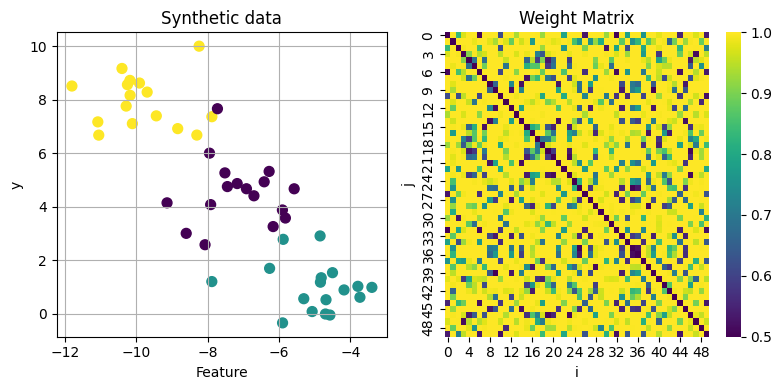

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# RBFKernel implementation
def rbf_kernel(X, gamma):

    N = X.shape[0]
    W = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            # compute distance ij according to the given formula
            dist_ij = np.linalg.norm(X[i] - X[j])**2  
            # wompute the weight for each pair i j and storing in a matrix
            W[i, j] = 1 / (1 + np.exp(-gamma * dist_ij))
    
    return W


# hyperparameters of the rbf kernel
sigma = 1.0
gamma = 1 / (2 * sigma**2)

# generate synthetic data
X, y = make_blobs(n_samples=50, centers=3, n_features=2, random_state=12)

# compute the wieghts
W = rbf_kernel(X, gamma)

# plotting the synthetic data , and a heatmap for vizualizing the weights
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("Synthetic data")
plt.xlabel("Feature")
plt.ylabel("y")
plt.grid()

plt.subplot(1, 2, 2)
sns.heatmap(W, cmap="viridis")
plt.title("Weight Matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.tight_layout()
plt.show()



### Flat clustering

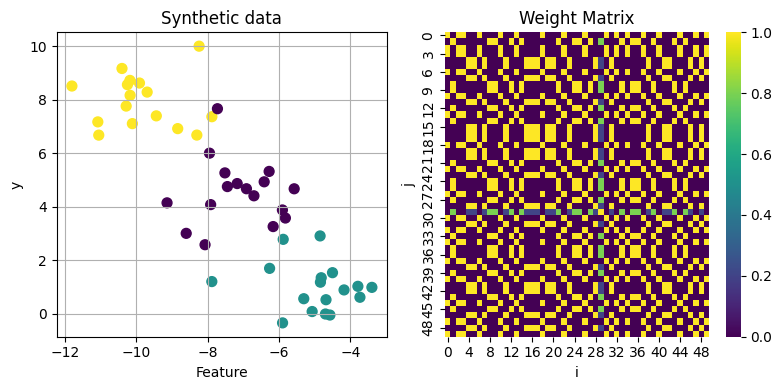

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def flat_clustering(X, n_clusters, n_iter):

    N = X.shape[0]
    W = np.zeros((N, N))
    
    # repeat k-means method n_iter times
    for _ in range(n_iter):
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=None)
        labels = kmeans.fit_predict(X)
        
        # update weight matrix by counting datapoints in the same cluster
        for i in range(N):
            for j in range(N):
                if labels[i] == labels[j]:
                    W[i, j] += 1
    
    # divide each element by n_iter to get the frequency
    W /= n_iter  
    
    return W

# hyperparameters for flat clustering
n_clusters = 3
n_iter = 10

# generate synthetic data
X, y = make_blobs(n_samples=50, centers=3, n_features=2, random_state=12)

# compute weights using flat clustering
W_flat = flat_clustering(X, n_clusters=n_clusters, n_iter=n_iter)

# plotting the synthetic data , and a heatmap for vizualizing the weights
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("Synthetic data")
plt.xlabel("Feature")
plt.ylabel("y")
plt.grid()

plt.subplot(1, 2, 2)
sns.heatmap(W_flat, cmap="viridis")
plt.title("Weight Matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.tight_layout()
plt.show()



### Hierarchical clustering

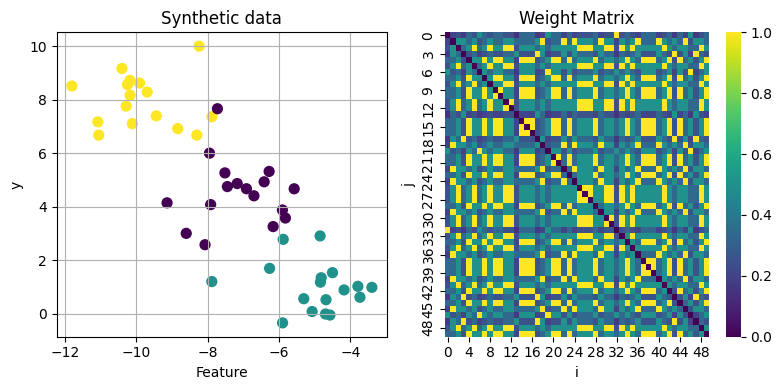

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, to_tree
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def hc_clusterring(X, method="ward"):

    # building hierarchical clustering
    distances = pdist(X)  
    Z = linkage(distances, method=method)
    
    N = X.shape[0]
    W = np.zeros((N, N))
    
    # compute depth h for each ij
    for i in range(N):
        for j in range(N):
            if i != j:
                h_ij = _find_separation_depth(Z, i, j)
                # convert h_ij to a weight and store it weight matrix
                W[i, j] = 1 / (1 + h_ij)
    
    return W

def _find_separation_depth(Z, i, j):

    # returns a tree representing the hc clustering, with a list of all the nodes in that tree
    tree, nodelist = to_tree(Z, rd=True)
    
    # recursive function to find depth of a given node
    def find_node(node, target, depth=0):
        if node.is_leaf() and node.id == target:
            return depth
        if node.left is not None:
            left = find_node(node.left, target, depth + 1)
            if left is not None:
                return left
        if node.right is not None:
            right = find_node(node.right, target, depth + 1)
            if right is not None:
                return right
        return None
    
    depth_i = find_node(tree, i)
    depth_j = find_node(tree, j)
    #returns separation depth
    return abs(depth_i - depth_j)



# generate synthetic data
X, y = make_blobs(n_samples=50, centers=3, n_features=2, random_state=12)

# compute weight 
W_hierarchical = hc_clusterring(X, method="ward")

# plotting the synthetic data , and a heatmap for vizualizing the weights
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("Synthetic data")
plt.xlabel("Feature")
plt.ylabel("y")
plt.grid()

plt.subplot(1, 2, 2)
sns.heatmap(W_hierarchical, cmap="viridis")
plt.title("Weight Matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.tight_layout()
plt.show()



#### Incremental clustering 
- we start with one cluster containing all datapoints, all the weights are equal

- at each iteration we add a new cluster by choosing a good candidate, a good candidate will be the point far away from current clusters
- we re-compute the clusters 
- compute and update the weights according to in-cluster relation, increase the weight for for points inside the same cluster and reduce it for points in different clusters
- we stop when kmax or convergeance is reached

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def incremental_clustering(X, kmax):
    # initialization parameters
    N = X.shape[0]
    # weight matrix
    W = np.zeros((N, N))
    # all points in one cluster  
    clusters = [X]  
    # get the centroid of this cluster
    centroids = [np.mean(X, axis=0)]  
    
    for k in range(1, kmax):
        # find the new candidate based on distance 
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
        new_centroid = np.argmax(distances)
        centroids.append(X[new_centroid])
        
        # re fit clusters
        labels = np.argmin([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
        # update weights based on cluster assignement
        for i in range(N):
            for j in range(N):
                if labels[i] == labels[j]:
                    W[i, j] += 1
        
    # normalize weights
    W /= kmax
    
    return W, labels




#### b) Using the generic synthetic data from the previous exercice 
##### Kernel Based approach

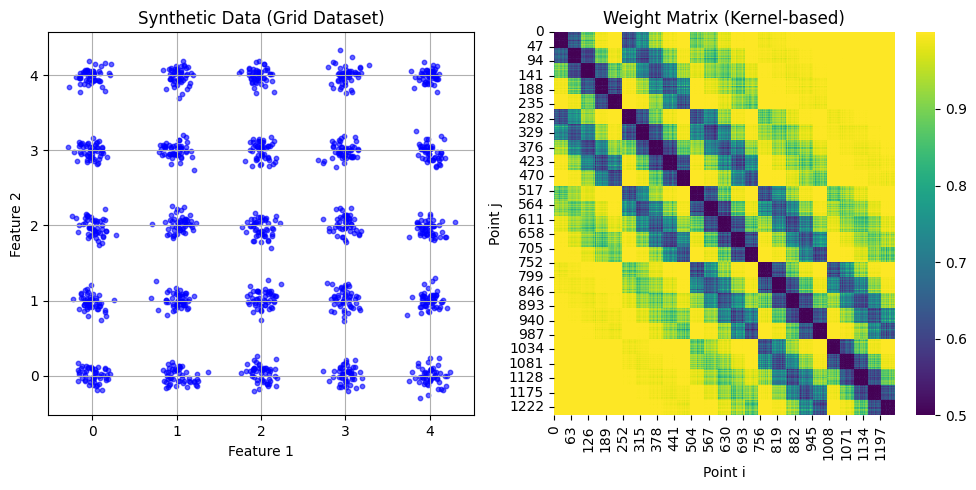

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_dataset(grid_size=5, N=50, sigma=0.1):
    clusters = []
    for i in range(grid_size):
        for j in range(grid_size):
            mean = np.array([j, grid_size - 1 - i])  
            cluster_points = np.random.normal(mean, sigma, size=(N, 2)) 
            clusters.append(cluster_points)
    return np.vstack(clusters)

# parameters
sigma = 1.0
gamma = 1 / (2 * sigma**2)

# generate sunthetic dataset
X = generate_dataset(grid_size=5, N=50, sigma=0.1)

# compute weight matrix
W = rbf_kernel(X, gamma)

# plotting results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=10, c='blue', alpha=0.6)
plt.title("Synthetic Data (Grid Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.subplot(1, 2, 2)
sns.heatmap(W, cmap="viridis")
plt.title("Weight Matrix (Kernel-based)")
plt.xlabel("Point i")
plt.ylabel("Point j")
plt.tight_layout()
plt.show()


##### Flat clustering

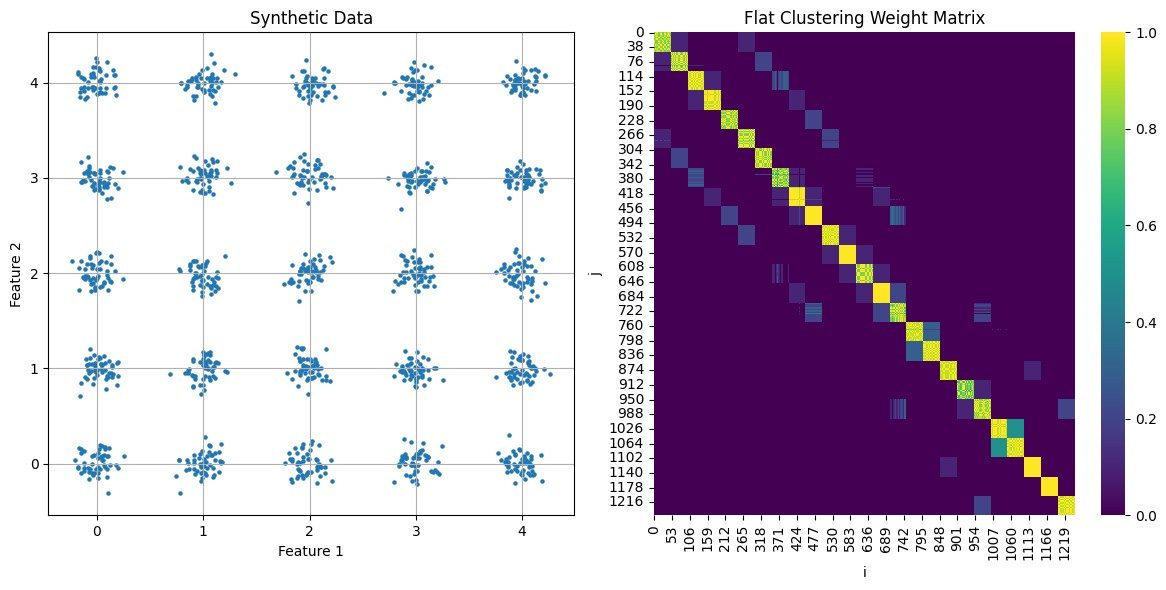

In [8]:
# Generate the synthetic dataset
X = generate_dataset(grid_size=5, N=50, sigma=0.1)

# Hyperparameters for flat clustering
n_clusters = 25  # Corresponds to the grid's clusters
n_iter = 10  # Number of iterations of k-means

# Compute weights using flat clustering
W_flat = flat_clustering(X, n_clusters=n_clusters, n_iter=n_iter)

# Plotting the synthetic data and a heatmap for visualizing the weights
plt.figure(figsize=(12, 6))

# Plotting the synthetic dataset
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()

# Plotting the weight matrix
plt.subplot(1, 2, 2)
sns.heatmap(W_flat, cmap="viridis")
plt.title("Flat Clustering Weight Matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.tight_layout()
plt.show()


#### Hierarchical Clustering 

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, to_tree
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


np.random.seed(12) 
X_synthetic = generate_dataset(grid_size=5, N=50, sigma=0.1)
W_hierarchical = hc_clusterring(X_synthetic, method="ward")

# plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], s=10)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.subplot(1, 2, 2)
sns.heatmap(W_hierarchical, cmap="viridis")
plt.title("Hierarchical Clustering Weight Matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.tight_layout()
plt.show()


#### Incremental clustering

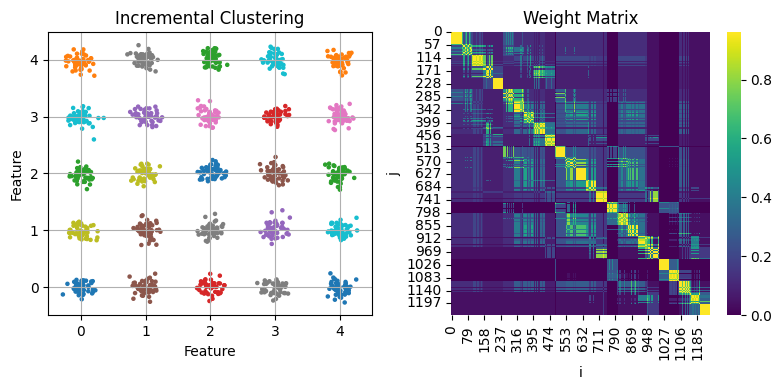

In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def incremental_clustering(X, kmax):
    # initialization parameters
    N = X.shape[0]
    # weight matrix
    W = np.zeros((N, N))
    # all points in one cluster  
    clusters = [X]  
    # get the centroid of this cluster
    centroids = [np.mean(X, axis=0)]  
    
    for k in range(1, kmax):
        # find the new candidate based on distance 
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
        new_centroid = np.argmax(distances)
        centroids.append(X[new_centroid])
        
        # re fit clusters
        labels = np.argmin([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
        # update weights based on cluster assignement
        for i in range(N):
            for j in range(N):
                if labels[i] == labels[j]:
                    W[i, j] += 1
        
    # normalize weights
    W /= kmax
    
    return W, labels


X = generate_dataset(grid_size=5, N=50, sigma=0.1)
kmax = 25
W_incremental, labels = incremental_clustering(X, kmax)

# Pplotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=5)
plt.title("Incremental Clustering")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.grid()
plt.subplot(1, 2, 2)
sns.heatmap(W_incremental, cmap="viridis")
plt.title("Weight Matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.tight_layout()
plt.show()


In [ ]:
# Define a single value for sigma
sigma = 1.0

# Generate dataset for the given sigma value
X_test = generate_dataset(grid_size=5, N=50, sigma=sigma)

# Kernel-based approach
gamma = 1 / (2 * sigma**2)
W_kernel = rbf_kernel(X_test, gamma)
silhouette_kernel = silhouette_score(X_test, np.argmax(W_kernel, axis=1))

# Flat Clustering approach
W_flat = flat_clustering(X_test, n_clusters=n_clusters, n_iter=n_iter)
silhouette_flat = silhouette_score(X_test, np.argmax(W_flat, axis=1))

# Hierarchical Clustering approach
W_hierarchical = hc_clusterring(X_test, method="ward")
silhouette_hierarchical = silhouette_score(X_test, np.argmax(W_hierarchical, axis=1))

# Incremental Clustering approach
W_incremental = incremental_clustering(X_test, kmax=kmax)
silhouette_incremental = silhouette_score(X_test, np.argmax(W_incremental, axis=1))

# Store results for sigma = 1
results_sigma_1 = {
    'sigma': sigma,
    'kernel_silhouette': silhouette_kernel,
    'flat_silhouette': silhouette_flat,
    'hierarchical_silhouette': silhouette_hierarchical,
    'incremental_silhouette': silhouette_incremental
}

results_sigma_1
